# Cluster
### Aprendizagem Automática e Ciências de Dados

#### Grupo 4
#### Dinis Carraça Nº 14058 & José Feiteira Nº 14300

In [1]:
%reset -f

## Requirements

In [2]:
!pip install -r requirements.txt
!pip install --upgrade statsmodels
!pip install miceforest
!pip install pingouin
!pip install --upgrade pingouin

  Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl.metadata (9.5 kB)
Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl (9.8 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.6
    Uninstalling statsmodels-0.14.6:
      Successfully uninstalled statsmodels-0.14.6
  Using cached statsmodels-0.14.6-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
Using cached statsmodels-0.14.6-cp313-cp313-win_amd64.whl (9.5 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.4
    Uninstalling statsmodels-0.14.4:
      Successfully uninstalled statsmodels-0.14.4


## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import miceforest as mf
import pingouin as pg

from scipy.spatial import distance
from sklearn.covariance import MinCovDet
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet, EmpiricalCovariance
from scipy.stats import chi2
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler

from miceforest import ImputationKernel

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Logit

from scipy.stats import skew, kurtosis

# Clusters
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

## Data Reading

In [4]:
df = pd.read_csv('pca_group_4.csv') 
df_2 = pd.read_csv('pca_group_4.csv')

df

,daily_active_users_per_1k,avg_session_duration,screens_per_session,feature_usage_diversity,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,0.618468,10.148114,6.071021,3.949454,5.673941,5.500851,6.838370,2.394955e+13,8.213288,4.583721,NaN,10.712480,4.302813,9.381756,4.389920
1,0.618467,NaN,3.796063,1.999873,5.218677,5.496677,5.459434,2.328595e+13,7.773575,5.572744,5.633490,11.269999,7.282001,9.643576,4.206871
2,0.618467,6.405489,3.878722,3.961220,2.478591,5.559581,4.178951,2.318226e+13,6.781985,6.300329,7.343624,10.587824,4.100798,9.133304,5.653438
3,0.618467,7.549743,4.774643,2.825635,4.047421,5.458533,3.216205,2.329317e+13,6.775012,4.928199,6.531811,11.394060,4.519294,8.791461,5.349756
4,0.618467,10.440767,9.578813,4.852759,4.912396,5.563851,4.062457,2.315365e+13,8.854584,7.492523,6.786275,11.350623,4.576925,10.723780,4.951948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.618467,7.787067,5.666652,3.596835,4.202992,5.491936,3.969249,2.315510e+13,6.993780,4.473312,6.510140,10.893950,4.482387,9.324372,5.084990
296,0.618467,9.043398,5.044051,1.838913,3.477297,5.502217,3.553777,2.288144e+13,7.666870,5.930969,6.030133,11.793351,7.505112,10.242859,2.515588
297,0.618467,9.662431,5.862714,4.045039,5.540337,5.523969,3.857879,2.324857e+13,6.582073,7.278113,6.231528,10.632968,4.439934,NaN,3.757774
298,0.618467,8.358244,5.531721,3.497520,3.305225,5.523526,2.730020,2.339173e+13,6.582961,6.931016,5.994316,11.775847,5.422842,9.691736,6.326503


#### **Gráfico Valores NAN**

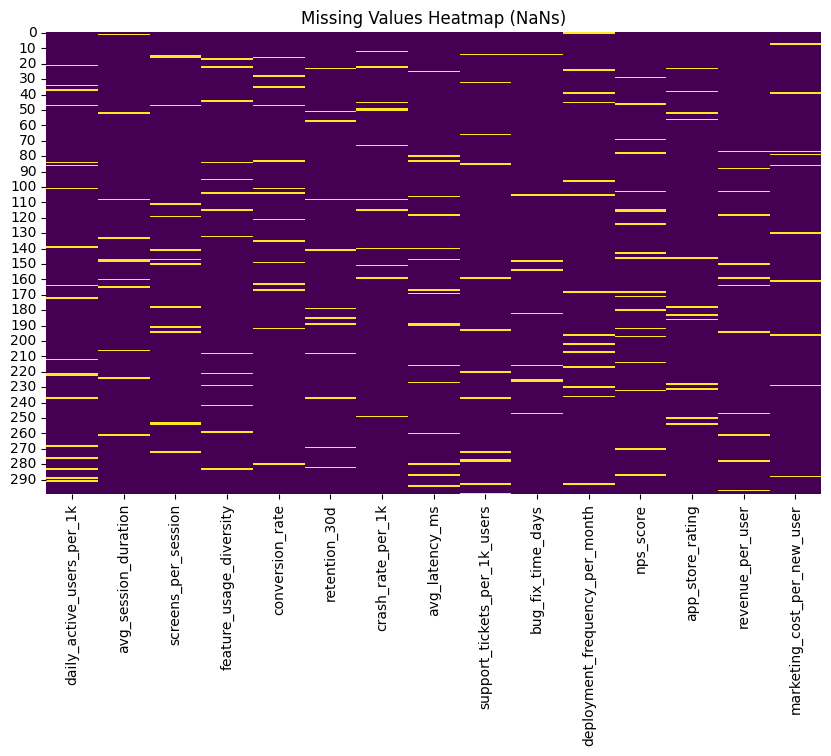

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (NaNs)')
plt.show()

#### Quantidade de NAN por coluna

In [6]:
df.isna().sum()


daily_active_users_per_1k         19
avg_session_duration              11
screens_per_session               14
feature_usage_diversity           14
conversion_rate                   14
retention_30d                     12
crash_rate_per_1k                 12
avg_latency_ms                    17
support_tickets_per_1k_users      13
bug_fix_time_days                  9
deployment_frequency_per_month    14
nps_score                         19
app_store_rating                  12
revenue_per_user                  12
marketing_cost_per_new_user       10
dtype: int64

### Máximos e Mínimos de Cada Coluna

In [7]:
for coluna in df.columns:
    max_value = df[coluna].max()
    min_value = df[coluna].min()
    print(f"Column: {coluna}")
    print(f"  Max: {max_value}")
    print(f"  Min: {min_value}\n")

Column: daily_active_users_per_1k
  Max: 1.8554023348858053
  Min: 0.6184662683937715

Column: avg_session_duration
  Max: 25.085762109718367
  Min: 5.1219735902654575

Column: screens_per_session
  Max: 19.5047309944197
  Min: 2.5145310854064715

Column: feature_usage_diversity
  Max: 16.67501673235293
  Min: 0.5208095070025197

Column: conversion_rate
  Max: 20.430665537138907
  Min: 1.570704739096392

Column: retention_30d
  Max: 16.687608449982168
  Min: 5.43338324268638

Column: crash_rate_per_1k
  Max: 13.351597985140785
  Min: 1.1468935865716547

Column: avg_latency_ms
  Max: 70959621865739.47
  Min: 22568880952552.406

Column: support_tickets_per_1k_users
  Max: 21.746925071703195
  Min: 4.355425106373031

Column: bug_fix_time_days
  Max: 19.6483737663182
  Min: 2.283557347852432

Column: deployment_frequency_per_month
  Max: 18.021891989544987
  Min: 4.507504776631743

Column: nps_score
  Max: 33.079770697577345
  Min: 9.847327349067662

Column: app_store_rating
  Max: 19.7595

## 1. OOR
### Tratar os valores "Out Of Range" do dataset

Como é possível ver nas células anteriores existem colunas com valores que ultrapassam o seu suposto intervalo, assim é necessário formatar os dados para que estejam inseridos nos mesmos.

In [8]:
df.columns

Index(['daily_active_users_per_1k', 'avg_session_duration',
       'screens_per_session', 'feature_usage_diversity', 'conversion_rate',
       'retention_30d', 'crash_rate_per_1k', 'avg_latency_ms',
       'support_tickets_per_1k_users', 'bug_fix_time_days',
       'deployment_frequency_per_month', 'nps_score', 'app_store_rating',
       'revenue_per_user', 'marketing_cost_per_new_user'],
      dtype='object')

**Tratamento dos valores**

Para este caso definimos que o tratamento seria o seguinte:

*Feature Usage Diversity* -- Vamos realizar um *rescale* aos dados;

*Nps Score* -- Colocar todos os valores abaixo de -100 e acima de 100 como Nan;

*App Store Rating* -- Fazer rescale aos dados para a escala desejada;

*Avg Latency (ms)* -- Alterar a escala através da transformação logarítmica, a partir desta conseguimos manter a unidade de medida desejada ao mesmo tempo que transformamos os dados em valores possíveis;

*Avg Session Duration, Screens per Session, Bug Fix Time (days), Deployment Frequency per Month, Revenue per User (€), Marketing Cost per New User (€), Daily Active Uses per 1k, Crash Rate per 1k e Support Tickets per 1k, Conversion Rate e Retention 30d* -- Deixar como está;

<br>

In [9]:
# Intervalo entre 0 e 1 (Com Rescale)
max_val = df['feature_usage_diversity'].max()
df['feature_usage_diversity'] = (df['feature_usage_diversity'] / max_val)

# Intervalo -100 e 100
df.loc[(df['nps_score'] > 100), 'nps_score'] = np.nan
df.loc[(df['nps_score'] < -100), 'nps_score'] = np.nan

# Intervalo entre 1 e 5 (Com Rescale)
df['app_store_rating'] = ((df['app_store_rating'] -df['app_store_rating'].min()) / (df['app_store_rating'].max() - df['app_store_rating'].min()) * 4 + 1)

# Transformação Logarítmica 
df["avg_latency_ms"] = np.log10(df["avg_latency_ms"])

df

,daily_active_users_per_1k,avg_session_duration,screens_per_session,feature_usage_diversity,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,0.618468,10.148114,6.071021,0.236849,5.673941,5.500851,6.838370,13.379297,8.213288,4.583721,NaN,10.712480,1.609865,9.381756,4.389920
1,0.618467,NaN,3.796063,0.119932,5.218677,5.496677,5.459434,13.367094,7.773575,5.572744,5.633490,11.269999,2.263292,9.643576,4.206871
2,0.618467,6.405489,3.878722,0.237554,2.478591,5.559581,4.178951,13.365156,6.781985,6.300329,7.343624,10.587824,1.565557,9.133304,5.653438
3,0.618467,7.549743,4.774643,0.169453,4.047421,5.458533,3.216205,13.367229,6.775012,4.928199,6.531811,11.394060,1.657346,8.791461,5.349756
4,0.618467,10.440767,9.578813,0.291020,4.912396,5.563851,4.062457,13.364620,8.854584,7.492523,6.786275,11.350623,1.669986,10.723780,4.951948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.618467,7.787067,5.666652,0.215702,4.202992,5.491936,3.969249,13.364647,6.993780,4.473312,6.510140,10.893950,1.649251,9.324372,5.084990
296,0.618467,9.043398,5.044051,0.110280,3.477297,5.502217,3.553777,13.359483,7.666870,5.930969,6.030133,11.793351,2.312226,10.242859,2.515588
297,0.618467,9.662431,5.862714,0.242581,5.540337,5.523969,3.857879,13.366396,6.582073,7.278113,6.231528,10.632968,1.639940,NaN,3.757774
298,0.618467,8.358244,5.531721,0.209746,3.305225,5.523526,2.730020,13.369062,6.582961,6.931016,5.994316,11.775847,1.855522,9.691736,6.326503


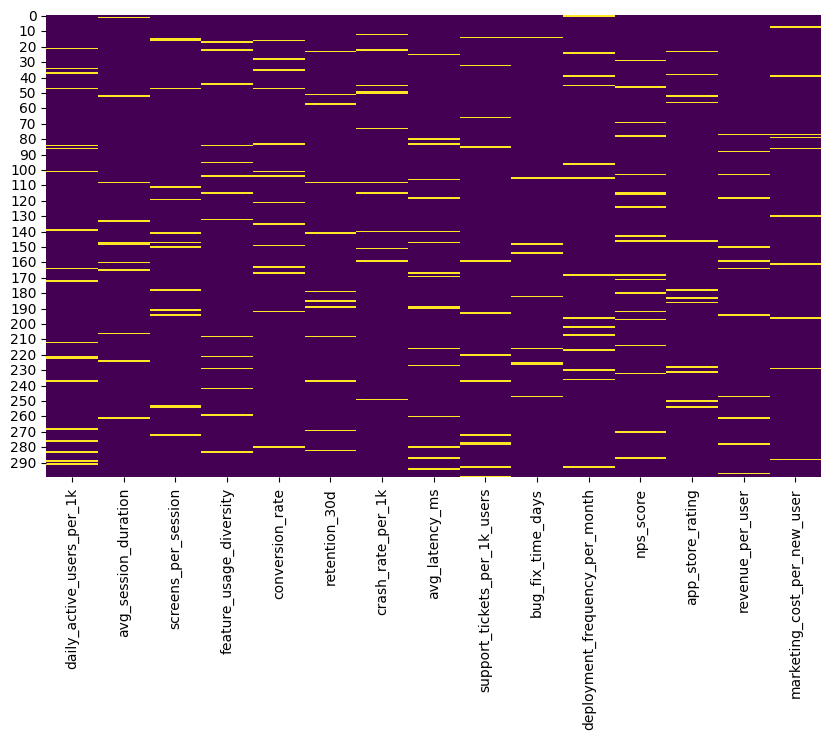

In [10]:
#Visualizar a quantidade de NAN's em cada coluna
plt.figure(figsize= (10, 6))
sns.heatmap(df.isnull(), cbar= False, cmap = "viridis")
plt.show()

### Numa outra abordagem em vez de tentarmos dar rescale à coluna *"Feature Usage Diversity"*, que contém demasiados valores que excedem o valor máximo do intervalo, vamos efetuar um drop das mesma

**Tratamento dos valores**

Para este caso definimos que o tratamento seria o seguinte:

*Feature Usage Diversity* -- Todos os valores abaixo de zero e acima de 1 são colocados como NAN;

-- Dos valores que sobram, e como os valores da variável apenas podem ser 0 ou 1, temos de realizar outro tratamento:
    
    --- Para os valores que estejam abaixo de 0.5, são transformados a 0;
    --- Para os valores que sejam iguais ou superiores 0.5, ficam a 1;          
*Nps Score* -- Colocar todos os valores abaixo de -100 e acima de 100 como Nan;

*App Store Rating* -- Todos os valores abaixo de 1 e acima de 5 são colocados como NAN;

*Avg Latency (ms)* -- Alterar a escala através da transformação logarítmica, a partir desta conseguimos manter a unidade de medida desejada ao mesmo tempo que transformamos os dados em valores possíveis;

*Daily Active Uses per 1k, Crash Rate per 1k, Support Tickets per 1k, Conversion Rate e Retention 30d, Avg Session Duration, Screens per Session, Bug Fix Time (days), Deployment Frequency per Month, Revenue per User (€), Marketing Cost per New User (€)* -- Não sofrem alteração;

<br>

In [11]:
# Intervalo entre 0 e 1 (Com NAN)
df_2.loc[(df_2['feature_usage_diversity'] > 1), 'feature_usage_diversity'] = np.nan
df_2.loc[(df_2['feature_usage_diversity'] < 0), 'feature_usage_diversity'] = np.nan

df_2.loc[(df_2['feature_usage_diversity'] >= 0.5), 'feature_usage_diversity'] = 1
df_2.loc[(df_2['feature_usage_diversity'] < 0.5), 'feature_usage_diversity'] = 0


# Intervalo -100 e 100
df_2.loc[(df_2['nps_score'] > 100), 'nps_score'] = np.nan
df_2.loc[(df_2['nps_score'] < -100), 'nps_score'] = np.nan

# Intervalo entre 1 e 5 (Com NAN)
df_2.loc[(df_2['app_store_rating'] > 5), 'app_store_rating'] = np.nan
df_2.loc[(df_2['app_store_rating'] < 1), 'app_store_rating'] = np.nan

# Transformação Logarítmica 
df_2["avg_latency_ms"] = np.log10(df_2["avg_latency_ms"])

df_2

,daily_active_users_per_1k,avg_session_duration,screens_per_session,feature_usage_diversity,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,0.618468,10.148114,6.071021,NaN,5.673941,5.500851,6.838370,13.379297,8.213288,4.583721,NaN,10.712480,4.302813,9.381756,4.389920
1,0.618467,NaN,3.796063,NaN,5.218677,5.496677,5.459434,13.367094,7.773575,5.572744,5.633490,11.269999,NaN,9.643576,4.206871
2,0.618467,6.405489,3.878722,NaN,2.478591,5.559581,4.178951,13.365156,6.781985,6.300329,7.343624,10.587824,4.100798,9.133304,5.653438
3,0.618467,7.549743,4.774643,NaN,4.047421,5.458533,3.216205,13.367229,6.775012,4.928199,6.531811,11.394060,4.519294,8.791461,5.349756
4,0.618467,10.440767,9.578813,NaN,4.912396,5.563851,4.062457,13.364620,8.854584,7.492523,6.786275,11.350623,4.576925,10.723780,4.951948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.618467,7.787067,5.666652,NaN,4.202992,5.491936,3.969249,13.364647,6.993780,4.473312,6.510140,10.893950,4.482387,9.324372,5.084990
296,0.618467,9.043398,5.044051,NaN,3.477297,5.502217,3.553777,13.359483,7.666870,5.930969,6.030133,11.793351,NaN,10.242859,2.515588
297,0.618467,9.662431,5.862714,NaN,5.540337,5.523969,3.857879,13.366396,6.582073,7.278113,6.231528,10.632968,4.439934,NaN,3.757774
298,0.618467,8.358244,5.531721,NaN,3.305225,5.523526,2.730020,13.369062,6.582961,6.931016,5.994316,11.775847,NaN,9.691736,6.326503


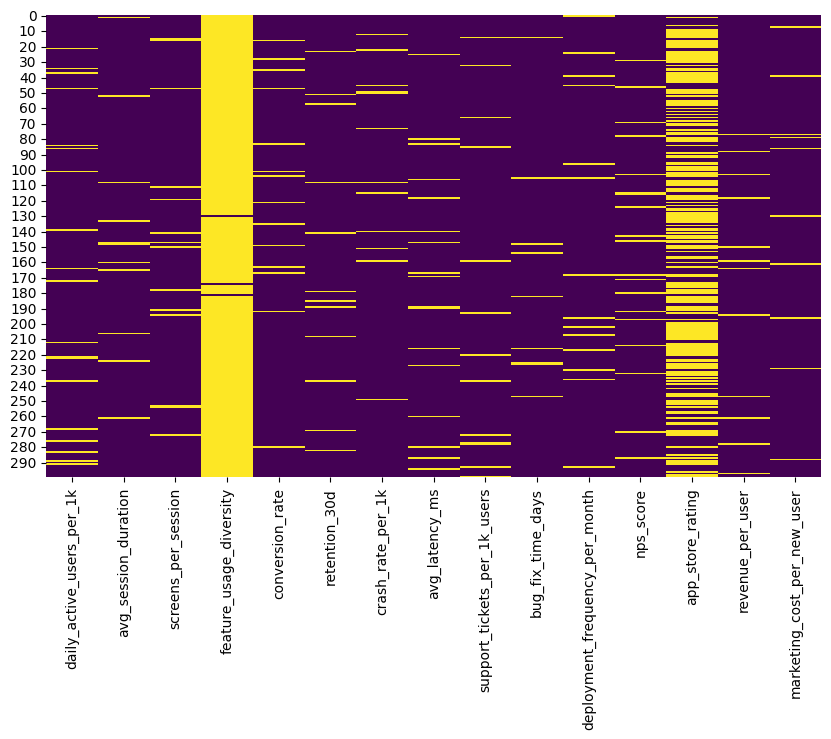

In [12]:
#Visualizar a quantidade de NAN's em cada coluna
plt.figure(figsize= (10, 6))
sns.heatmap(df_2.isnull(), cbar= False, cmap = "viridis")
plt.show()

Como podemos reparar na figura acima, a coluna correspondente a *"Feature Usage Diversity"* fica com um elevado número de NAN através da abordagem anterior.
No ponto que se segue vamos ver como lidamos com este caso.

## MISSINGS

In [13]:
# número de NAN's atualizado
print("Número de NANs Atualizado para o dataframe 1 (com Rescale)")
df.isna().sum()

Número de NANs Atualizado para o dataframe 1 (com Rescale)


daily_active_users_per_1k         19
avg_session_duration              11
screens_per_session               14
feature_usage_diversity           14
conversion_rate                   14
retention_30d                     12
crash_rate_per_1k                 12
avg_latency_ms                    17
support_tickets_per_1k_users      13
bug_fix_time_days                  9
deployment_frequency_per_month    14
nps_score                         19
app_store_rating                  12
revenue_per_user                  12
marketing_cost_per_new_user       10
dtype: int64

In [14]:
print("Número de NANs Atualizado para o dataframe 2 (com NAN)")
df_2.isna().sum()

Número de NANs Atualizado para o dataframe 2 (com NAN)


daily_active_users_per_1k          19
avg_session_duration               11
screens_per_session                14
feature_usage_diversity           297
conversion_rate                    14
retention_30d                      12
crash_rate_per_1k                  12
avg_latency_ms                     17
support_tickets_per_1k_users       13
bug_fix_time_days                   9
deployment_frequency_per_month     14
nps_score                          19
app_store_rating                  178
revenue_per_user                   12
marketing_cost_per_new_user        10
dtype: int64

In [15]:
# Certificar de que não temos colunas vazias ou com muitos valores como NAN, se for esse o caso da primeira situação podemos retirá-las do dataframe
print("Dataframe 1")
empty_cols = df.columns[df.isnull().all()]
print("Colunas com todos os valores Null:", list(empty_cols))

threshold = 0.80
nan_cols = df.loc[:, df.isna().mean() >= threshold]
print("Colunas com mais de 80% dos valores como Nan:", list(nan_cols))

Dataframe 1
Colunas com todos os valores Null: []
Colunas com mais de 80% dos valores como Nan: []


In [16]:
print("Dataframe 2")
empty_cols = df_2.columns[df.isnull().all()]
print("Colunas com todos os valores Null:", list(empty_cols))

threshold = 0.80 
nan_cols = df_2.loc[:, df_2.isna().mean() >= threshold]
print("Colunas com mais de 80% dos valores como Nan:", list(nan_cols))


Dataframe 2
Colunas com todos os valores Null: []
Colunas com mais de 80% dos valores como Nan: ['feature_usage_diversity']


Visto que a coluna "Feature Usage Diversity" tem mais de 80% dos seus valores como NAN, vamos realizar um *drop* à mesma e retirá-la do *dataframe*

In [17]:
df_2 = df_2.drop('feature_usage_diversity', axis=1)

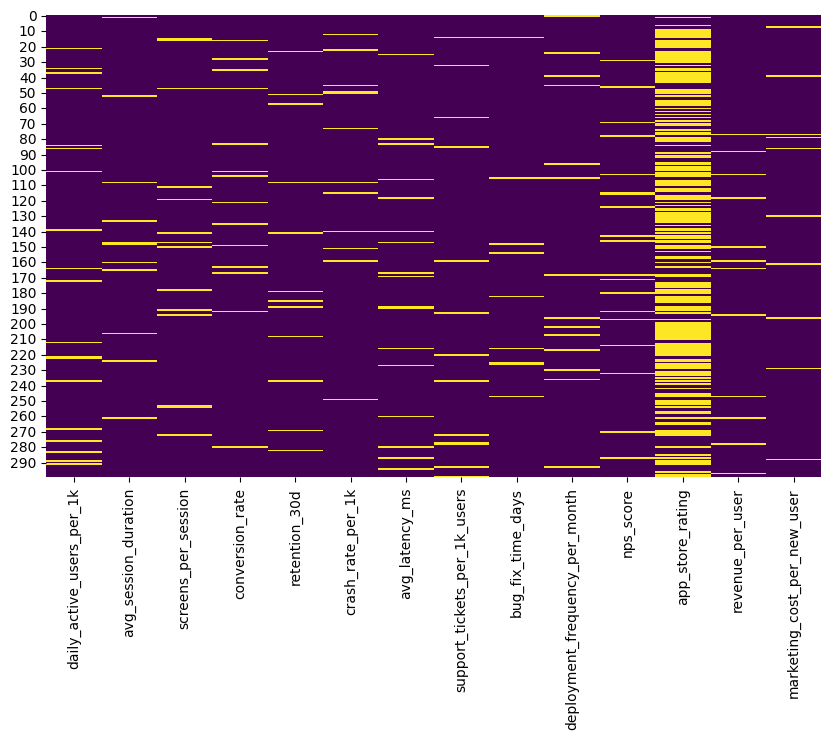

In [18]:
#Visualizar a quantidade de NAN's em cada coluna, dataframe 2 atualizado
plt.figure(figsize= (10, 6))
sns.heatmap(df_2.isnull(), cbar= False, cmap = "viridis")
plt.show()

A nossa abordagem, para este caso, foi então simplesmente retirar coluna por completo do dataframe.

## 2. Imputation
### Predictive Mean Matching

Para realizarmos todas as operações inerentes ao dataframe precisamos que não existam valores NAN, um dos processos que podemos realizar para alterar os valores é o **"Predictive Mean Matching"**.

Consiste em:
1. Criar uma *regressão* com os valores não NAN para a coluna
2. Calcular estimativas para cada valor da coluna
3. Encontrar os *k neighbours* que tenham valores perto da estimativa calculada
4. Escolher um deles para ser o novo valor
5. Repetir para cada coluna

### 2.1 PMM Dataframe 1

In [19]:
kernel = ImputationKernel(df, num_datasets=1, save_all_iterations_data=True, random_state=42)

# 5 iterações de MICE
kernel.mice(5, mean_match_candidates=3, mean_match_strategy="nearest")

# DataFrame imputado
df_imp = kernel.complete_data(0) # Dataframe sem os valores NAN
df_imp.head()


,daily_active_users_per_1k,avg_session_duration,screens_per_session,feature_usage_diversity,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,0.618468,10.148114,6.071021,0.236849,5.673941,5.500851,6.838370,13.379297,8.213288,4.583721,6.256699,10.712480,1.609865,9.381756,4.389920
1,0.618467,8.706847,3.796063,0.119932,5.218677,5.496677,5.459434,13.367094,7.773575,5.572744,5.633490,11.269999,2.263292,9.643576,4.206871
2,0.618467,6.405489,3.878722,0.237554,2.478591,5.559581,4.178951,13.365156,6.781985,6.300329,7.343624,10.587824,1.565557,9.133304,5.653438
3,0.618467,7.549743,4.774643,0.169453,4.047421,5.458533,3.216205,13.367229,6.775012,4.928199,6.531811,11.394060,1.657346,8.791461,5.349756
4,0.618467,10.440767,9.578813,0.291020,4.912396,5.563851,4.062457,13.364620,8.854584,7.492523,6.786275,11.350623,1.669986,10.723780,4.951948


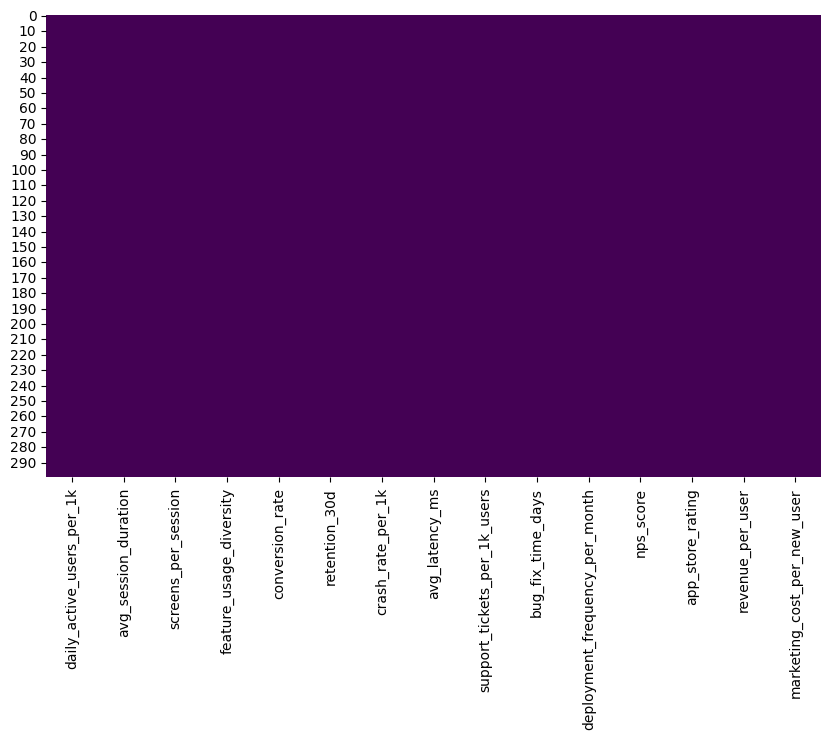

In [20]:
plt.figure(figsize= (10, 6))
sns.heatmap(df_imp.isnull(), cbar= False, cmap = "viridis")
plt.show()

In [21]:
print("Valores NAN após PMM")
print("Antes:", df.isna().sum().sum())
print("Depois:", df_imp.isna().sum().sum())

Valores NAN após PMM
Antes: 202
Depois: 0


Depois de remover os valores *OOR* e substituir os valores *NAN* o dataset não tem mais valores não designados ou que não estejam contidos no intervalo desejado.

### 2.2 PMM Dataframe 2

In [22]:
kernel = ImputationKernel(df_2, num_datasets=1, save_all_iterations_data=True, random_state=42)

# 5 iterações de MICE
kernel.mice(5, mean_match_candidates=3, mean_match_strategy="nearest")

# DataFrame imputado
df_imp_2 = kernel.complete_data(0) # Dataframe sem os valores NAN
df_imp_2.head()

,daily_active_users_per_1k,avg_session_duration,screens_per_session,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,0.618468,10.148114,6.071021,5.673941,5.500851,6.838370,13.379297,8.213288,4.583721,6.371389,10.712480,4.302813,9.381756,4.389920
1,0.618467,8.353909,3.796063,5.218677,5.496677,5.459434,13.367094,7.773575,5.572744,5.633490,11.269999,4.628378,9.643576,4.206871
2,0.618467,6.405489,3.878722,2.478591,5.559581,4.178951,13.365156,6.781985,6.300329,7.343624,10.587824,4.100798,9.133304,5.653438
3,0.618467,7.549743,4.774643,4.047421,5.458533,3.216205,13.367229,6.775012,4.928199,6.531811,11.394060,4.519294,8.791461,5.349756
4,0.618467,10.440767,9.578813,4.912396,5.563851,4.062457,13.364620,8.854584,7.492523,6.786275,11.350623,4.576925,10.723780,4.951948


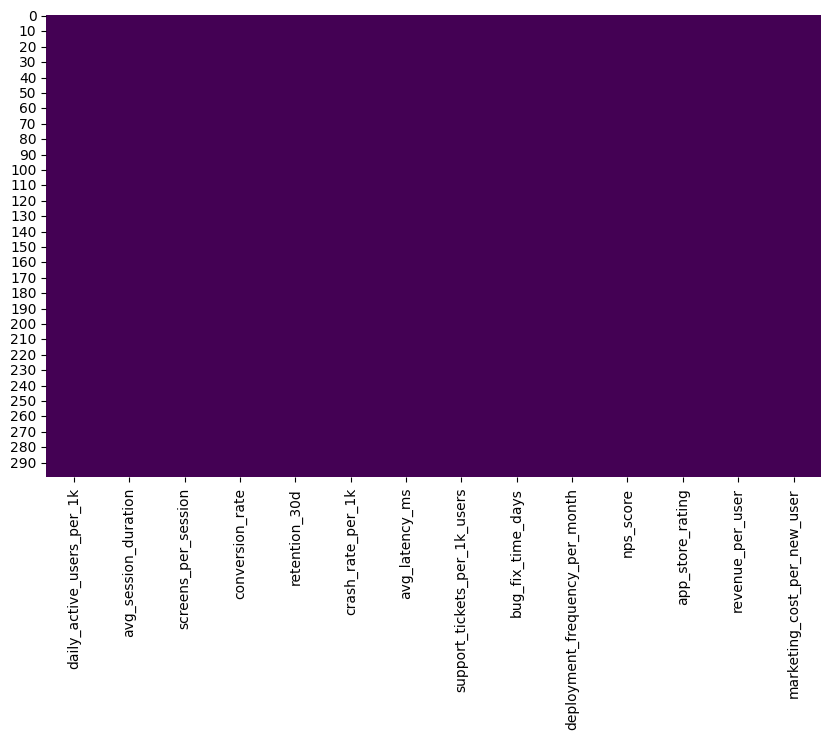

In [23]:
plt.figure(figsize= (10, 6))
sns.heatmap(df_imp_2.isnull(), cbar= False, cmap = "viridis")
plt.show()

In [24]:
print("Valores NAN após PMM")
print("Antes:", df_2.isna().sum().sum())
print("Depois:", df_imp_2.isna().sum().sum())

Valores NAN após PMM
Antes: 354
Depois: 0


## 3 Tratar Outliers

### 3.1 Outliers Dataframe 1

#### 3.1.1 Teste de Mardia

In [25]:
df_imp.dtypes
df_imp

,daily_active_users_per_1k,avg_session_duration,screens_per_session,feature_usage_diversity,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,0.618468,10.148114,6.071021,0.236849,5.673941,5.500851,6.838370,13.379297,8.213288,4.583721,6.256699,10.712480,1.609865,9.381756,4.389920
1,0.618467,8.706847,3.796063,0.119932,5.218677,5.496677,5.459434,13.367094,7.773575,5.572744,5.633490,11.269999,2.263292,9.643576,4.206871
2,0.618467,6.405489,3.878722,0.237554,2.478591,5.559581,4.178951,13.365156,6.781985,6.300329,7.343624,10.587824,1.565557,9.133304,5.653438
3,0.618467,7.549743,4.774643,0.169453,4.047421,5.458533,3.216205,13.367229,6.775012,4.928199,6.531811,11.394060,1.657346,8.791461,5.349756
4,0.618467,10.440767,9.578813,0.291020,4.912396,5.563851,4.062457,13.364620,8.854584,7.492523,6.786275,11.350623,1.669986,10.723780,4.951948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.618467,7.787067,5.666652,0.215702,4.202992,5.491936,3.969249,13.364647,6.993780,4.473312,6.510140,10.893950,1.649251,9.324372,5.084990
296,0.618467,9.043398,5.044051,0.110280,3.477297,5.502217,3.553777,13.359483,7.666870,5.930969,6.030133,11.793351,2.312226,10.242859,2.515588
297,0.618467,9.662431,5.862714,0.242581,5.540337,5.523969,3.857879,13.366396,6.582073,7.278113,6.231528,10.632968,1.639940,9.195296,3.757774
298,0.618467,8.358244,5.531721,0.209746,3.305225,5.523526,2.730020,13.369062,6.582961,6.931016,5.994316,11.775847,1.855522,9.691736,6.326503


In [26]:
def mardia_test(df):
    X = df.to_numpy()
    n, p = X.shape
    mean = X.mean(axis=0)
    S = np.cov(X, rowvar=False)
    S_inv = np.linalg.inv(S)
    Xc = X - mean
    
    # Mahalanobis distances
    D = Xc @ S_inv @ Xc.T
    b1p = (np.sum(D**3)) / (n**2)
    k = np.trace((D @ D) / n)
    
    # Estatistica de teste
    skew_chi2 = b1p * n / 6
    skew_pval = 1 - chi2.cdf(skew_chi2, df=p*(p+1)*(p+2)/6)
    
    kurt_z = (k - p*(p+2)) / np.sqrt(8*p*(p+2)/n)
    kurt_pval = 2 * (1 - chi2.cdf(abs(kurt_z), df=1))
    
    return pd.DataFrame({
        'Value': [b1p, k],
        'pval': [skew_pval, kurt_pval],
        'normal': [skew_pval >= 0.05, kurt_pval >= 0.05]
    }, index=['skewness', 'kurtosis'])

mardia = mardia_test(df_imp)
print(mardia)

               Value  pval  normal
skewness   667.36298   0.0   False
kurtosis  4470.05000   0.0   False


Como os p-values estão igual a zero significa que o dataset não está normalizado, logo vamos ter de realizar a normalização através do Yeo-Johnson como referido anteriormente.

#### 3.1.2 Yeo-Johson

In [27]:
# Aplciar Yeo-Johnson
yeo = PowerTransformer(method='yeo-johnson', standardize=True)
transformed_data = yeo.fit_transform(df_imp)

imputed_df_yeojohnson = pd.DataFrame(transformed_data, columns=df_imp.columns)


Depois de aplicarmos o Yeo-Johnson voltamos a realizar o teste de Mardia.

In [28]:
print("Teste de Mardia antes de Yeo-Johnson:")
mardia = mardia_test(df_imp)
print(mardia)
print()

print("Teste de Mardia depois de Yeo-Johnson:")
mardia = mardia_test(imputed_df_yeojohnson)
print(mardia)

Teste de Mardia antes de Yeo-Johnson:
               Value  pval  normal
skewness   667.36298   0.0   False
kurtosis  4470.05000   0.0   False

Teste de Mardia depois de Yeo-Johnson:
                Value  pval  normal
skewness   235.167574   0.0   False
kurtosis  4470.050000   0.0   False


Como podemos ver os p-values mantêm-se iguais, o que significa que vamos ter de utilzar a disância de Mahalanobis robusta

#### 3.1.3 Robust Mahalanobis Distance

A distância robusta de Mahalanobis minimiza o impacto dos outliars.

Para a calcular vamos utilizar o método MCD, *Minimum Covariance Determinant*,este funciona da seguinte forma:
1. Identifica *subsets* de *data* que estão mais concentrados
2. Calcula média e covariância do subset
3. Escolhe o subset que tenha a matriz de covariância com menor determinante



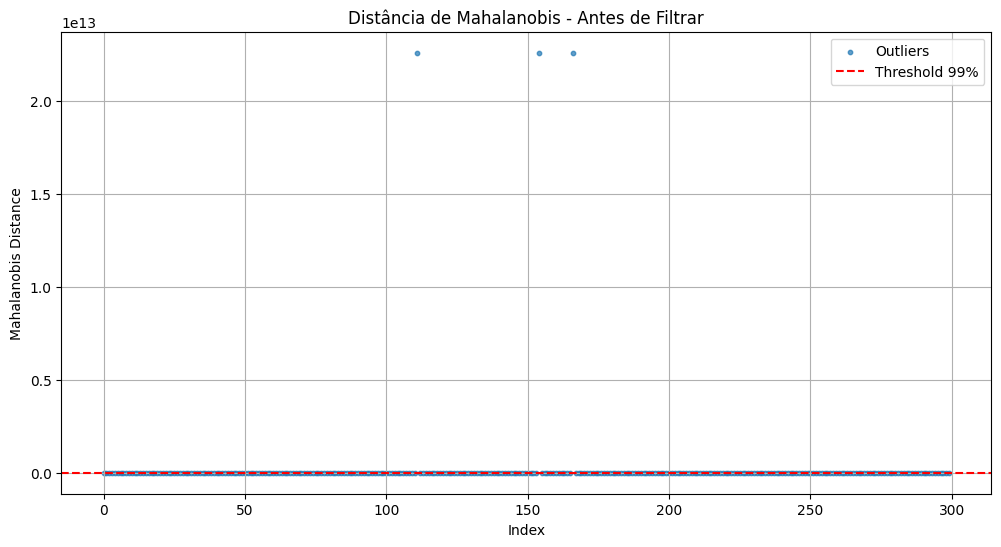

In [29]:
df_scaled = RobustScaler().fit_transform(df_imp)
mcd = MinCovDet(support_fraction=0.9, random_state=42).fit(df_scaled)

robust_md = mcd.mahalanobis(df_scaled)

# Limite (99%)
threshold = chi2.ppf(0.99, df=df_scaled.shape[1])

outliers_mask = robust_md > threshold

plt.figure(figsize=(12, 6))

plt.scatter(
    range(len(robust_md)),
    robust_md,
    label="Outliers",
    alpha=0.7,
    s=10
)
plt.axhline(threshold, color="red", linestyle="--", label="Threshold 99%")
plt.title("Distância de Mahalanobis - Antes de Filtrar")
plt.xlabel("Index")
plt.ylabel("Mahalanobis Distance")
plt.legend()
plt.grid(True)
plt.show()


Como podemos reparar na figura acima a distância calculada antes de filtrar atinge valores muito grandes, 10^13.

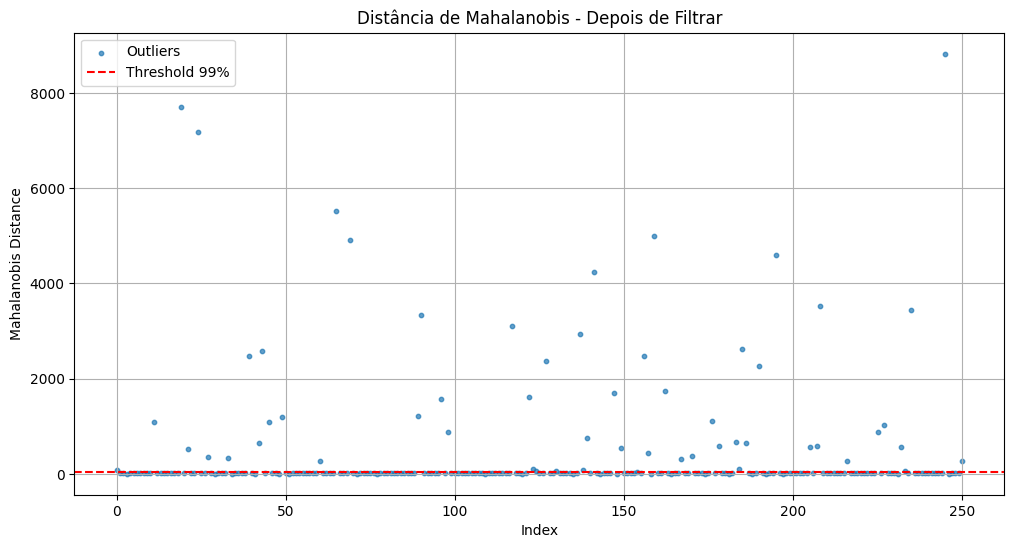

In [30]:
df_scaled = pd.DataFrame(df_scaled, columns=df_imp.columns)
df_clean = df_scaled.loc[~outliers_mask].reset_index(drop=True)
X_clean = df_clean.select_dtypes(include=[np.number])

scaler = RobustScaler()
X_scaled_clean = scaler.fit_transform(X_clean)

mcd_after = MinCovDet(support_fraction=0.8, random_state=42).fit(X_scaled_clean)
robust_md_after = mcd_after.mahalanobis(X_scaled_clean)

plt.figure(figsize=(12, 6))
plt.scatter(
    range(len(robust_md_after)),
    robust_md_after,
    label="Outliers",
    alpha=0.7,
    s=10
)
plt.axhline(threshold, color="red", linestyle="--", label="Threshold 99%")
plt.title("Distância de Mahalanobis - Depois de Filtrar")
plt.xlabel("Index")
plt.ylabel("Mahalanobis Distance")
plt.legend()
plt.grid(True)
plt.show()


Ao filtrarmos reduzimos a escala para a ordem dos milhares.

In [31]:
print("Tamanho original:", df_imp.shape)
print("Tamanho sem outliers:", df_clean.shape)

df_clean.head() # Dataframe sem Outliers

Tamanho original: (300, 15)
Tamanho sem outliers: (251, 15)


,daily_active_users_per_1k,avg_session_duration,screens_per_session,feature_usage_diversity,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,1.365073,0.767327,0.261780,-0.032339,0.676673,-0.618089,1.463434,1.076442,0.883539,-0.825774,0.216563,-0.637735,-0.498733,0.016407,-0.014631
1,0.014407,-0.053756,-0.834279,-1.181517,0.398714,-0.686036,0.679254,-0.292061,0.577403,-0.187967,-0.608288,0.158461,1.145959,0.262016,-0.139845
2,-0.794565,-1.364828,-0.794455,-0.025404,-1.274230,0.337830,-0.048939,-0.509421,-0.112958,0.281242,1.655167,-0.815757,-0.610258,-0.216664,0.849675
3,-0.025550,-0.712952,-0.362806,-0.694773,-0.316390,-1.306883,-0.596438,-0.276956,-0.117813,-0.603625,0.580689,0.335633,-0.379222,-0.537343,0.641942
4,-0.008756,0.934050,1.951810,0.500113,0.211716,0.407337,-0.115187,-0.569544,1.330020,1.050071,0.917485,0.273601,-0.347407,1.275343,0.369823


In [32]:
df_clean.describe()

,daily_active_users_per_1k,avg_session_duration,screens_per_session,feature_usage_diversity,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,-0.067918,0.012277,0.010406,-0.041810,-0.073977,0.030147,0.030244,0.039012,0.009711,0.044255,0.034013,-0.008469,0.021213,-0.021064,-0.021370
std,0.656301,0.718204,0.702261,0.718461,0.672363,0.694797,0.642396,0.659706,0.700416,0.787700,0.820520,0.739259,0.656956,0.664766,0.773707
min,-1.926965,-1.843740,-1.451713,-2.053349,-1.828535,-1.716245,-1.773226,-1.815379,-1.802370,-2.183352,-2.098590,-1.873265,-1.877401,-1.415662,-2.337369
25%,-0.570083,-0.464554,-0.515467,-0.540179,-0.562896,-0.482010,-0.410106,-0.486516,-0.472857,-0.406893,-0.441828,-0.493825,-0.447294,-0.536775,-0.517505
50%,-0.018351,0.000350,-0.041089,-0.032339,-0.069789,-0.020171,0.032507,0.061110,0.028428,0.013886,-0.000154,-0.001835,-0.008657,-0.037425,0.009148
75%,0.383721,0.523719,0.504295,0.469295,0.410678,0.534098,0.526868,0.495835,0.479954,0.484429,0.512421,0.457424,0.538694,0.478191,0.475261
max,1.518978,1.866687,1.951810,1.862273,2.111677,1.986402,1.800379,1.863396,1.617451,2.999345,2.601954,2.474204,1.725319,1.923476,2.307287


### 3.2 Outliers Dataframe 2

#### 3.2.1 Teste de Mardia

In [33]:
def mardia_test(df):
    X = df.to_numpy()
    n, p = X.shape
    mean = X.mean(axis=0)
    S = np.cov(X, rowvar=False)
    S_inv = np.linalg.inv(S)
    Xc = X - mean
    
    # Mahalanobis distances
    D = Xc @ S_inv @ Xc.T
    b1p = (np.sum(D**3)) / (n**2)
    k = np.trace((D @ D) / n)
    
    # Estatistica de teste
    skew_chi2 = b1p * n / 6
    skew_pval = 1 - chi2.cdf(skew_chi2, df=p*(p+1)*(p+2)/6)
    
    kurt_z = (k - p*(p+2)) / np.sqrt(8*p*(p+2)/n)
    kurt_pval = 2 * (1 - chi2.cdf(abs(kurt_z), df=1))
    
    return pd.DataFrame({
        'Value': [b1p, k],
        'pval': [skew_pval, kurt_pval],
        'normal': [skew_pval >= 0.05, kurt_pval >= 0.05]
    }, index=['skewness', 'kurtosis'])

mardia_2 = mardia_test(df_imp_2)
print(mardia_2)

                Value  pval  normal
skewness   643.099899   0.0   False
kurtosis  4172.046667   0.0   False


#### 3.2.2 Yeo-Johson

In [34]:
# Aplicar o Yeo-Johson
yeo = PowerTransformer(method='yeo-johnson', standardize=True)
transformed_data = yeo.fit_transform(df_imp_2)

imputed_df_yeojohnson_2 = pd.DataFrame(transformed_data, columns=df_imp_2.columns)

In [35]:
print("Teste de Mardia antes de Yeo-Johnson:")
mardia = mardia_test(df_imp_2)
print(mardia)
print()

print("Teste de Mardia depois de Yeo-Johnson:")
mardia = mardia_test(imputed_df_yeojohnson_2)
print(mardia)

Teste de Mardia antes de Yeo-Johnson:
                Value  pval  normal
skewness   643.099899   0.0   False
kurtosis  4172.046667   0.0   False

Teste de Mardia depois de Yeo-Johnson:
                Value  pval  normal
skewness   216.952475   0.0   False
kurtosis  4172.046667   0.0   False


#### 3.2.3 Robust Mahalanobis Distance

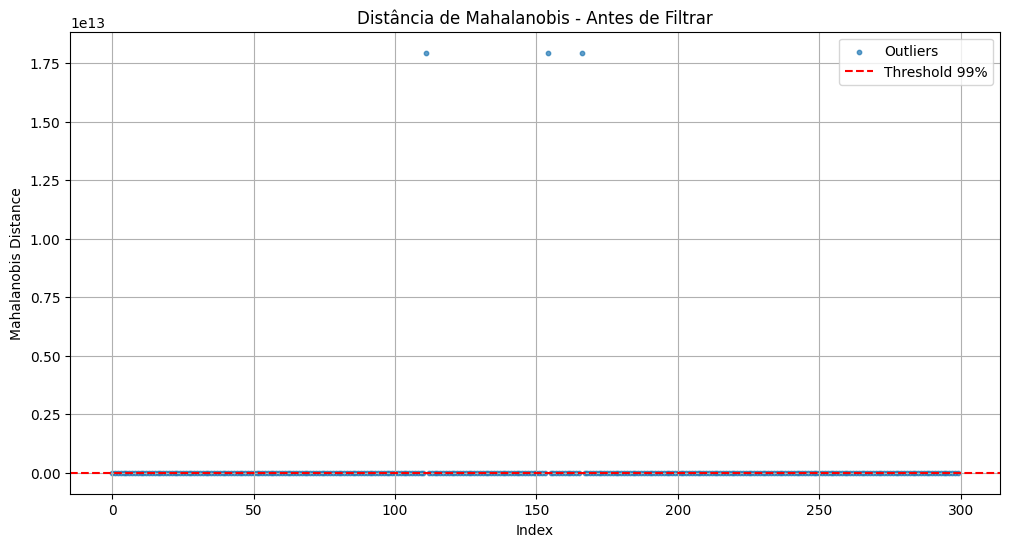

In [36]:
df_scaled_2 = RobustScaler().fit_transform(df_imp_2)
mcd = MinCovDet(support_fraction=0.9, random_state=42).fit(df_scaled_2)

robust_md_2 = mcd.mahalanobis(df_scaled_2)

# Limite (99%)
threshold = chi2.ppf(0.99, df=df_scaled_2.shape[1])

outliers_mask = robust_md_2 > threshold

plt.figure(figsize=(12, 6))
plt.scatter(
    range(len(robust_md_2)),
    robust_md_2,
    label="Outliers",
    alpha=0.7,
    s=10
)
plt.axhline(threshold, color="red", linestyle="--", label="Threshold 99%")
plt.title("Distância de Mahalanobis - Antes de Filtrar")
plt.xlabel("Index")
plt.ylabel("Mahalanobis Distance")
plt.legend()
plt.grid(True)
plt.show()

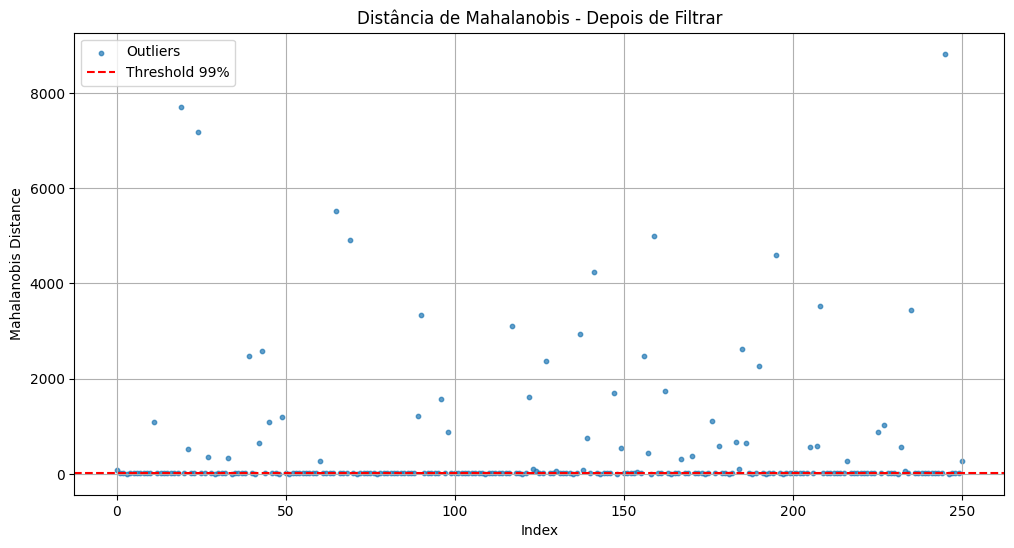

In [37]:
df_scaled = pd.DataFrame(df_scaled, columns=df_imp_2.columns)
df_clean_2 = df_scaled.loc[~outliers_mask].reset_index(drop=True)
X_clean_2 = df_clean.select_dtypes(include=[np.number])

scaler = RobustScaler()
X_scaled_clean_2 = scaler.fit_transform(X_clean_2)

mcd_after = MinCovDet(support_fraction=0.8, random_state=42).fit(X_scaled_clean_2)
robust_md_after = mcd_after.mahalanobis(X_scaled_clean_2)

plt.figure(figsize=(12, 6))
plt.scatter(
    range(len(robust_md_after)),
    robust_md_after,
    label="Outliers",
    alpha=0.7,
    s=10
)
plt.axhline(threshold, color="red", linestyle="--", label="Threshold 99%")
plt.title("Distância de Mahalanobis - Depois de Filtrar")
plt.xlabel("Index")
plt.ylabel("Mahalanobis Distance")
plt.legend()
plt.grid(True)
plt.show()

In [38]:
print("Tamanho original:", df_imp_2.shape)
print("Tamanho sem outliers:", df_clean_2.shape)

Tamanho original: (300, 14)
Tamanho sem outliers: (255, 14)


# 4. Clusters

Agora, e depois de concluído o tratamento de dados sobre o *dataset* original, vamos passar para o. 



## 4.1 Dataframe 1

## 4.1.1 Hierárquicos

Os algoritmos de clusters hierárquicos que vamos usar são:

- Single;
- Complete;
- Average;

### 4.1.1.1 Single Linkage

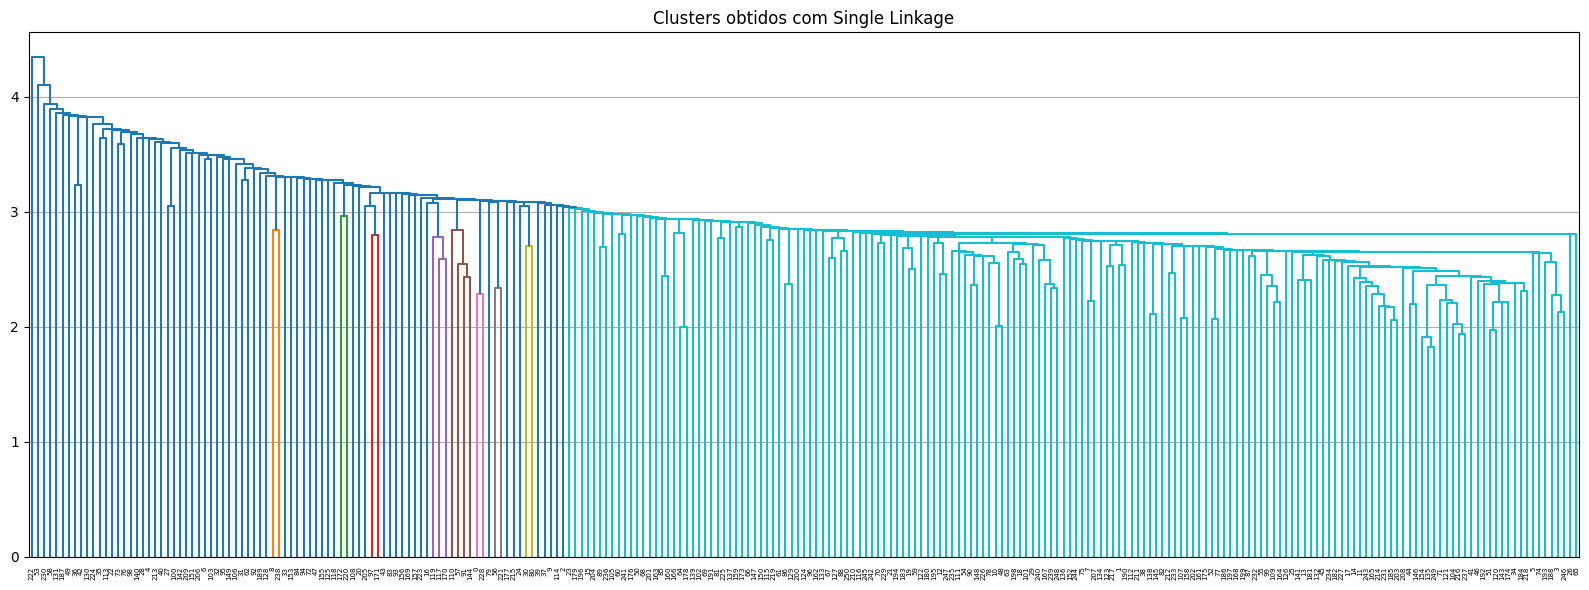

In [39]:
## Implementação Single Linkage
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

cluster_single = linkage(X_scaled, method='single')

plt.figure(figsize=(16,6))
dendrogram(cluster_single)
plt.title("Clusters obtidos com Single Linkage")
plt.savefig("dendrograma_single_linkage.png", dpi=300)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### Ao analisar a figura acima notamos que o método Single Linkage não é o mais indicado para o nosso dataframe, por causa do efeito de "Chaining" apresentado, isto é, o algoritmo ligou os pontos em muitos grupos "1 a 1" o que resulta na linha quase contínua, pouca diferança entre os clusters, visível.

### 4.1.1.2 Complete Linkage

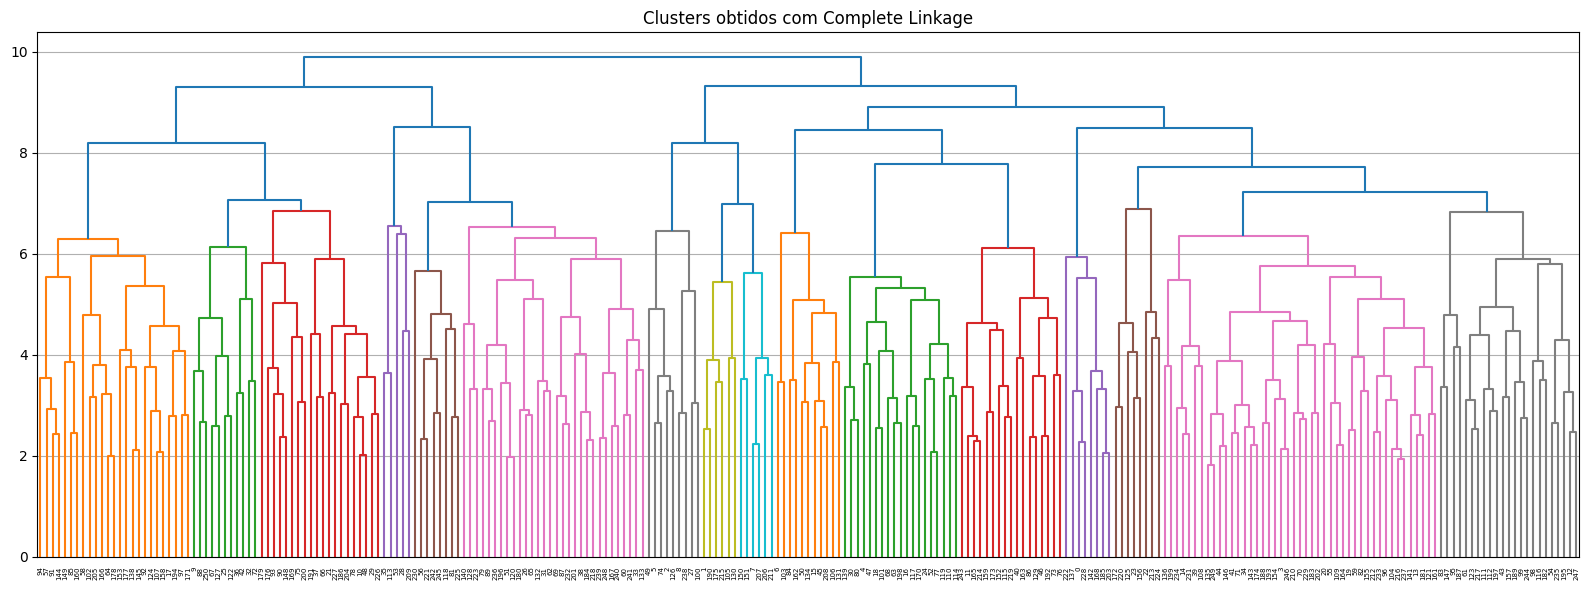

In [40]:
## Implementação Complete Linkage
df_numeric = df_clean.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

cluster_complete = linkage(X_scaled, method='complete')

plt.figure(figsize=(16,6))
dendrogram(cluster_complete)
plt.title("Clusters obtidos com Complete Linkage")
plt.savefig("dendrograma_complete_linkage.png", dpi=300)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### No complete linkage é notada uma grande diferença face ao método anterior. Agora os ramos estão mais equilibrados, consequentemente, existem clusters mais compactos e melhor separados entre eles.
#### Deste modo facilitando a escolha do número de clusters

### 4.1.1.3 Average Linkage

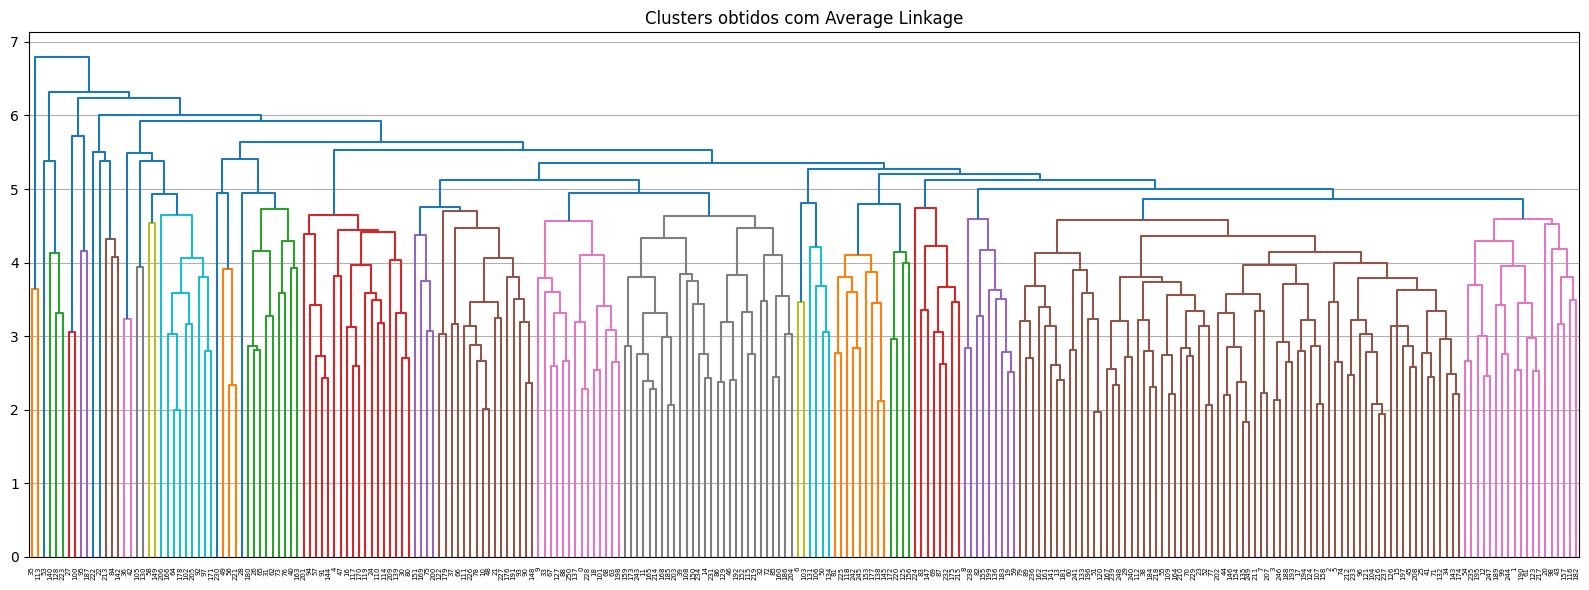

In [41]:
## Implementação Average Linkage
df_numeric = df_clean.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

cluster_average = linkage(X_scaled, method='average')

plt.figure(figsize=(16,6))
dendrogram(cluster_average)
plt.title("Clusters obtidos com Average Linkage")
plt.savefig("dendrograma_avg_linkage.png", dpi=300)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

#### Conclusão 
O average linkage apresentou uma estrutura equilibrada face aos outros dois métodos. É menos esticado comparado ao single linkage, logo tem menos underfit, e é menos rígido quando comparado com o complete linkage, tendo menos overfit. 

Pela a análise dos dendogramas chegamos à conclusão de que 5 seria um número possível de clusters para o nosso dataframe, botido através da análise principalmente do *Complete e Average Linkage*.

### Silhouette Score
De modo a nos certificarmos de que o número escolhido anteriormente é de facto um bom valor, vamos calcular o *"Silhouette Score"* para o cluster obtido pelo método.

O resultado deste é um valor entre -1 e 1, onde quanto mais perto de 1 estiver melhor definido será o cluster.

In [42]:
labels = fcluster(cluster_average, 5, criterion='maxclust')

score = silhouette_score(X_scaled, labels)
print(f"k= 5, silhouette={score:.3f}")

k= 5, silhouette=0.032


Como podemos notar pelo valor obtido, 5 clusters pode não ser o melhor valor para o nosso dataframe.

### **Apesar disso como a separação visual é clara vamos manter o número definido.**

### 4.1.2 Não Hierárquicos

### 4.1.2.1 K-Means

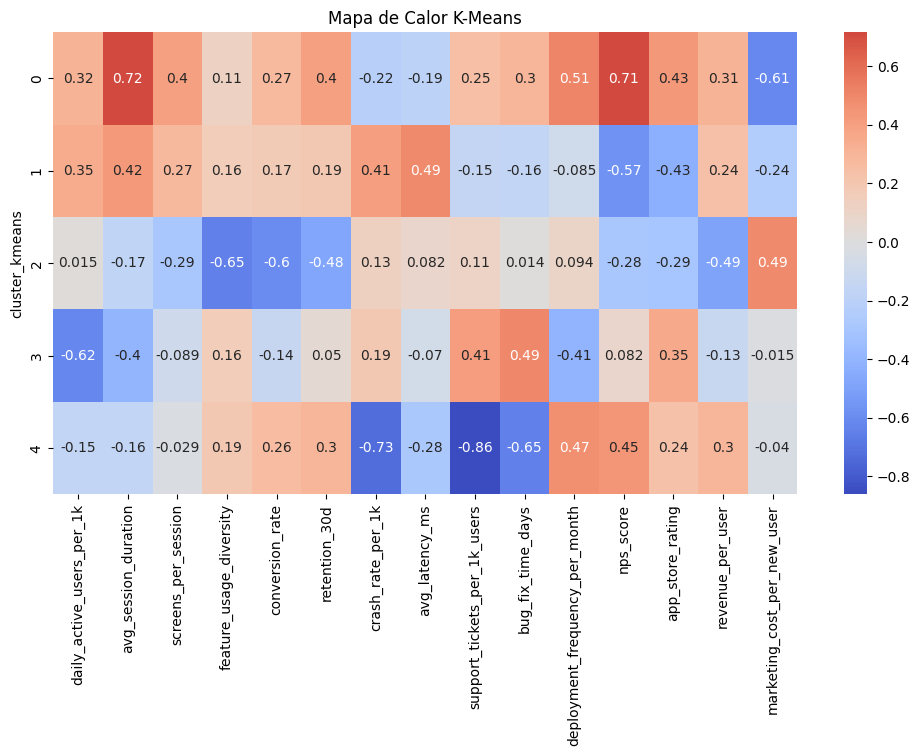

In [43]:
## Implementação K-Means

df_k = df_clean.copy() 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_

# Add cluster labels to your dataframe
df_k['cluster_kmeans'] = labels

#print(df_k.groupby('cluster_kmeans').mean())


plt.figure(figsize=(12,6))
sns.heatmap(df_k.groupby('cluster_kmeans').mean(), annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor K-Means")
plt.show()


### 4.1.3 Análise dos clusters

#### 4.1.3.1 Características Médias

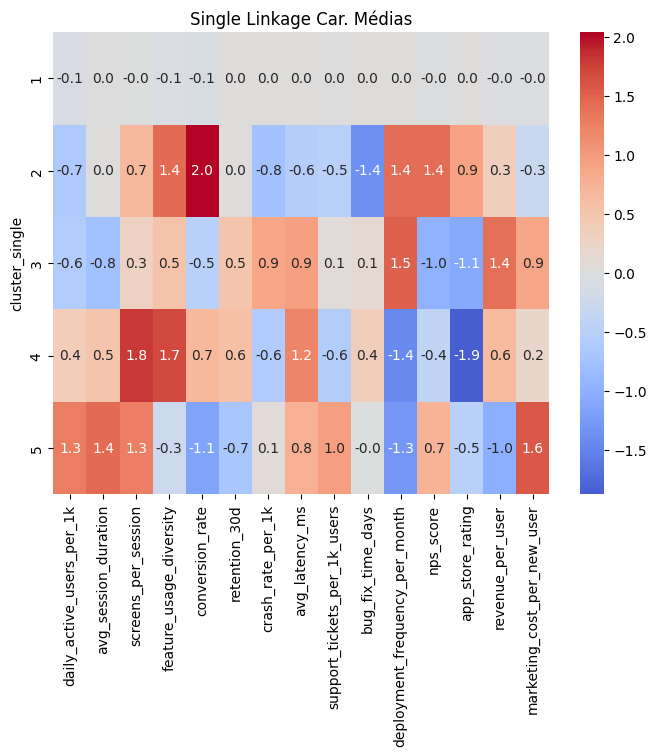

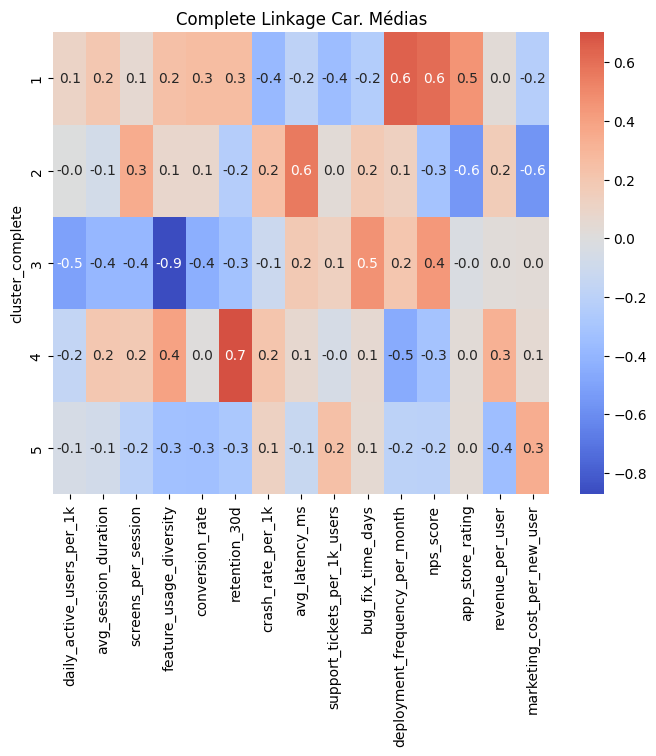

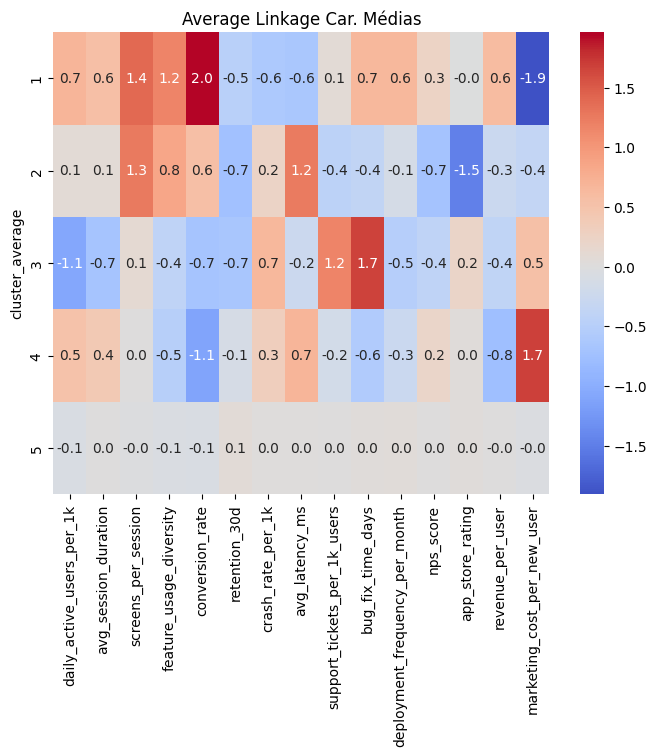

In [44]:
df_sing = df_clean.copy()
labels_single = fcluster(cluster_single, t=5, criterion='maxclust')  
df_sing['cluster_single'] = labels_single


df_comp = df_clean.copy()
labels_complete = fcluster(cluster_complete, t=5, criterion='maxclust')  
df_comp['cluster_complete'] = labels_complete

df_avg = df_clean.copy()
labels_avg = fcluster(cluster_average, t=5, criterion='maxclust')  
df_avg['cluster_average'] = labels_avg

# Single Linkage
plt.figure(figsize=(8,6))
sns.heatmap(df_sing.groupby('cluster_single').mean(), annot=True,fmt=".1f", cmap='coolwarm', center=0)
plt.title("Single Linkage Car. Médias")
plt.savefig("mapa_calor_single_linkage.png", dpi=300)
plt.show()

# Complete Linkage
plt.figure(figsize=(8,6))
sns.heatmap(df_comp.groupby('cluster_complete').mean(), annot=True,fmt=".1f", cmap='coolwarm', center=0)
plt.title("Complete Linkage Car. Médias")
plt.savefig("mapa_calor_complete_linkage.png", dpi=300)
plt.show() 

# Average Linkage
plt.figure(figsize=(8,6))
sns.heatmap(df_avg.groupby('cluster_average').mean(), annot=True,fmt=".1f",cmap='coolwarm', center=0)
plt.title("Average Linkage Car. Médias")
plt.savefig("mapa_calor_avg_linkage.png", dpi=300)
plt.show()

Ao analisarmos os mapas de calor gerados acima conseguimos retirar as seguintes conclusões para cada tipo de *Linkage*:

- **Single Linkage**:

  Cluster 1: Utilizador comum, não existem features que os distingam;


  Cluster 2: Utilizadores que dão altas classificações à aplicação tendem a realizar a ação-alvo;


  Cluster 3: Maior número de atualizações e adição de feature resulta em maior *revenue* por utilizador;


  Cluster 4: Utilizadores que usam muitos ecrãs e muitas features;


  Cluster 5: Maior número de utilizadores implica maior gasto no marketing;
    
- **Complete Linkage**:


  Cluster 1: Maior número de atualizações resulta em maior *score*;


  Cluster 2: Alta latência leva a pior ratings;


  Cluster 3: Apesar de não se usarem tantas features o tempo de arranjo dos bugs mantém-se elevado;


  Cluster 4: Maior retenção quando se utilizam mais *features*;


  Cluster 5: Maior gasto em novos utilizadores diminui a *revenue* obtida nos mesmos;

- **Average Linkage**:


  Cluster 1: A realização da ação-alvo está relacionada com o número de ecrãs e *features* mas não com marketing;


  Cluster 2: Muitos ecrãs resultam numa latência elevada que por sua vez resulta em piores *scores*;


  Cluster 3: A demora na resolução de bugs resulta em menos utilizadores ativos;


  Cluster 4: Um gasto elevado no marketing não implica um maior número de ações alvo realizadas;


  Cluster 5: Utilizador comum;

#### 4.1.3.2 Perfis dos Clusters

In [45]:
def cluster_profiling(
    df,
    cluster_col,
    n_top_features=5,
    n_text_features=3,
    plot_heatmap=True,
    heatmap_figsize=(10, 6),
    cmap='coolwarm'
):
    """
    Computes cluster profiles including:
    - Mean characteristics
    - Standardized (z-score) profiles
    - Cluster sizes and shares
    - Reduced profile with most influential features
    - Textual cluster descriptions
    - Optional heatmap visualization
    """

    # ---------- Basic setup ----------
    features = df.drop(columns=[cluster_col])
    clusters = df[cluster_col]

    # ---------- Means ----------
    cluster_means = df.groupby(cluster_col).mean()

    # ---------- Sizes ----------
    cluster_sizes = clusters.value_counts().sort_index()
    cluster_shares = cluster_sizes / len(df)

    # ---------- Standardized profiles ----------
    global_mean = features.mean()
    global_std = features.std()

    cluster_profile_z = (cluster_means - global_mean) / global_std

    # ---------- Combined profile ----------
    cluster_profile = pd.concat(
        {
            'mean': cluster_means,
            'z_score': cluster_profile_z
        },
        axis=1
    )

    cluster_profile['size'] = cluster_sizes
    cluster_profile['share'] = cluster_shares

    # ---------- Most influential features ----------
    important_features = (
        cluster_profile_z
        .abs()
        .mean()
        .sort_values(ascending=False)
        .head(n_top_features)
        .index
    )

    cluster_profile_reduced = cluster_profile.loc[
        :, pd.IndexSlice[:, important_features]
    ]

    # ---------- Textual descriptions ----------
    print("\n===== CLUSTER PROFILES =====")

    for cluster in cluster_profile_z.index:
        print(f"\nCluster {cluster} "
              f"(n={cluster_sizes[cluster]}, "
              f"share={cluster_shares[cluster]:.2%}):")

        top_feats = (
            cluster_profile_z.loc[cluster]
            .abs()
            .sort_values(ascending=False)
            .head(n_text_features)
            .index
        )

        for feat in top_feats:
            val = cluster_profile_z.loc[cluster, feat]
            direction = "higher" if val > 0 else "lower"
            print(f"  • {direction} than average {feat} ({val:.2f}σ)")

    # ---------- Heatmap ----------
    if plot_heatmap:
        plt.figure(figsize=heatmap_figsize)
        sns.heatmap(
            cluster_profile_z,
            cmap=cmap,
            center=0,
            annot=True,
            fmt='.2f'
        )
        plt.title("Standardized Cluster Profiles")
        plt.tight_layout()
        plt.show()

    return {
        'mean_profile': cluster_means,
        'z_profile': cluster_profile_z,
        'full_profile': cluster_profile,
        'reduced_profile': cluster_profile_reduced
    }



===== CLUSTER PROFILES =====

Cluster 1 (n=247, share=98.41%):
  • lower than average screens_per_session (-0.02σ)
  • lower than average feature_usage_diversity (-0.02σ)
  • higher than average app_store_rating (0.02σ)

Cluster 2 (n=1, share=0.40%):
  • higher than average conversion_rate (3.14σ)
  • higher than average feature_usage_diversity (2.05σ)
  • higher than average nps_score (1.94σ)

Cluster 3 (n=1, share=0.40%):
  • higher than average revenue_per_user (2.12σ)
  • higher than average deployment_frequency_per_month (1.81σ)
  • lower than average app_store_rating (-1.69σ)

Cluster 4 (n=1, share=0.40%):
  • lower than average app_store_rating (-2.89σ)
  • higher than average screens_per_session (2.56σ)
  • higher than average feature_usage_diversity (2.43σ)

Cluster 5 (n=1, share=0.40%):
  • higher than average daily_active_users_per_1k (2.07σ)
  • higher than average marketing_cost_per_new_user (2.05σ)
  • higher than average avg_session_duration (1.99σ)


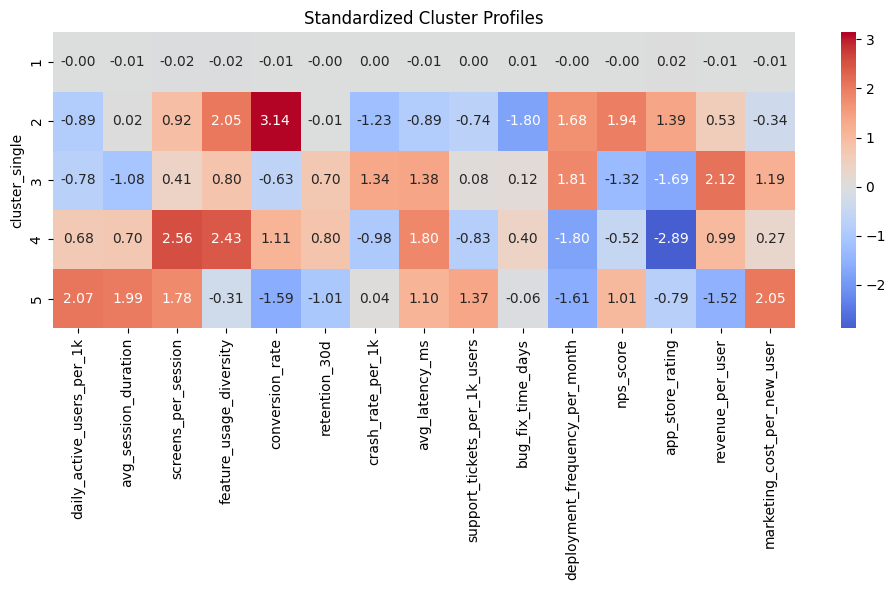


===== CLUSTER PROFILES =====

Cluster 1 (n=56, share=22.31%):
  • higher than average nps_score (0.83σ)
  • higher than average deployment_frequency_per_month (0.75σ)
  • higher than average app_store_rating (0.66σ)

Cluster 2 (n=43, share=17.13%):
  • lower than average app_store_rating (-0.88σ)
  • higher than average avg_latency_ms (0.78σ)
  • lower than average marketing_cost_per_new_user (-0.70σ)

Cluster 3 (n=21, share=8.37%):
  • lower than average feature_usage_diversity (-1.16σ)
  • lower than average daily_active_users_per_1k (-0.67σ)
  • higher than average nps_score (0.60σ)

Cluster 4 (n=47, share=18.73%):
  • higher than average retention_30d (0.97σ)
  • higher than average feature_usage_diversity (0.61σ)
  • lower than average deployment_frequency_per_month (-0.60σ)

Cluster 5 (n=84, share=33.47%):
  • lower than average revenue_per_user (-0.50σ)
  • higher than average marketing_cost_per_new_user (0.47σ)
  • lower than average retention_30d (-0.44σ)


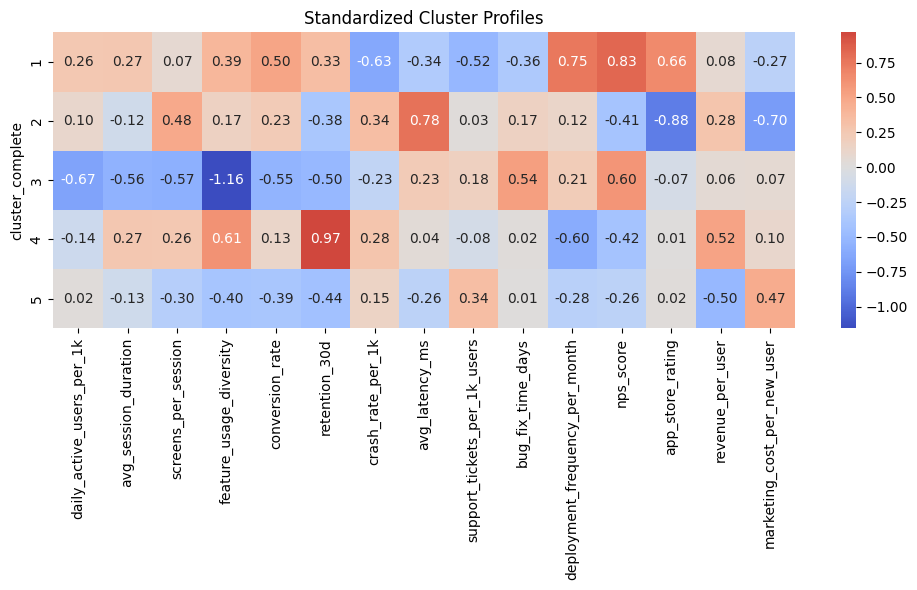


===== CLUSTER PROFILES =====

Cluster 1 (n=2, share=0.80%):
  • higher than average conversion_rate (3.03σ)
  • lower than average marketing_cost_per_new_user (-2.44σ)
  • higher than average screens_per_session (1.97σ)

Cluster 2 (n=4, share=1.59%):
  • lower than average app_store_rating (-2.27σ)
  • higher than average avg_latency_ms (1.82σ)
  • higher than average screens_per_session (1.78σ)

Cluster 3 (n=4, share=1.59%):
  • higher than average bug_fix_time_days (2.07σ)
  • higher than average support_tickets_per_1k_users (1.66σ)
  • lower than average daily_active_users_per_1k (-1.54σ)

Cluster 4 (n=5, share=1.99%):
  • higher than average marketing_cost_per_new_user (2.21σ)
  • lower than average conversion_rate (-1.54σ)
  • lower than average revenue_per_user (-1.11σ)

Cluster 5 (n=236, share=94.02%):
  • lower than average screens_per_session (-0.05σ)
  • higher than average retention_30d (0.05σ)
  • lower than average avg_latency_ms (-0.04σ)


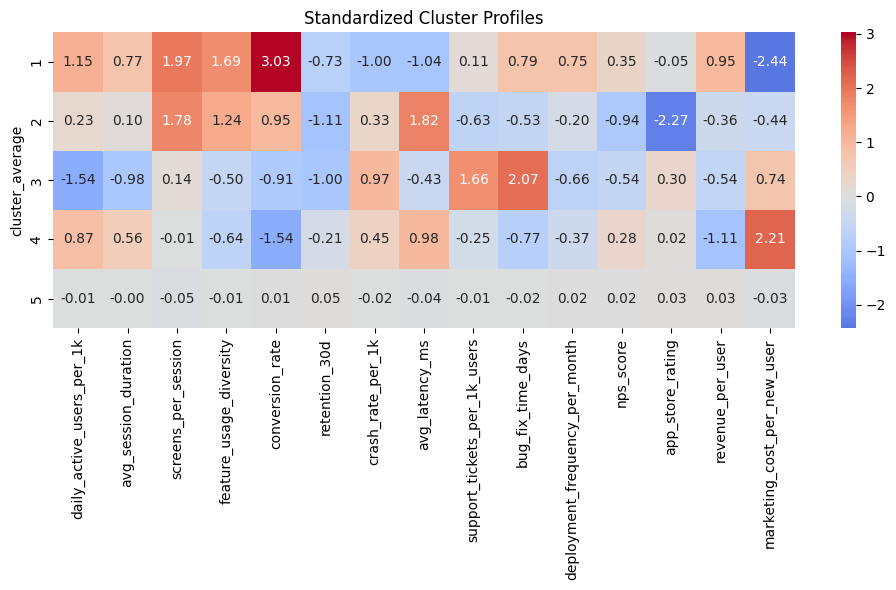

In [46]:
profiles_single = cluster_profiling(
    df=df_sing,
    cluster_col='cluster_single'
)

profiles_complete = cluster_profiling(
    df=df_comp,
    cluster_col='cluster_complete'
)

profiles_average = cluster_profiling(
    df=df_avg,
    cluster_col='cluster_average'
)


Ao analisarmos os resultados acima obtidos notamos que existe uma clara semelhança entre estes e os obtidos no cálculo das características médias.

#### 4.1.3.3 Variáveis Mais Influentes

In [47]:
def plot_feature_influence(
    data,
    cluster_col,
    title,
    filename,
    figsize=(15, 6),
    sep_color='gray',
    palette = "tab10"
):
    plt.figure(figsize=figsize)

    sns.barplot(data=data,x='Feature',y='Relative Weight',hue=cluster_col,palette = palette)

    # Horizontal baseline
    plt.axhline(0, color='black', lw=1)

    # Vertical separators between features
    ax = plt.gca()
    n_features = data['Feature'].nunique()

    for i in range(n_features):
        ax.axvline(i - 0.5,color=sep_color,linewidth=0.8,linestyle='--',zorder=0)

    plt.title(title)
    plt.ylabel("Weight")
    plt.xticks(rotation=45)
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    if filename is not None:
        plt.savefig(filename, dpi=300)

    plt.show()


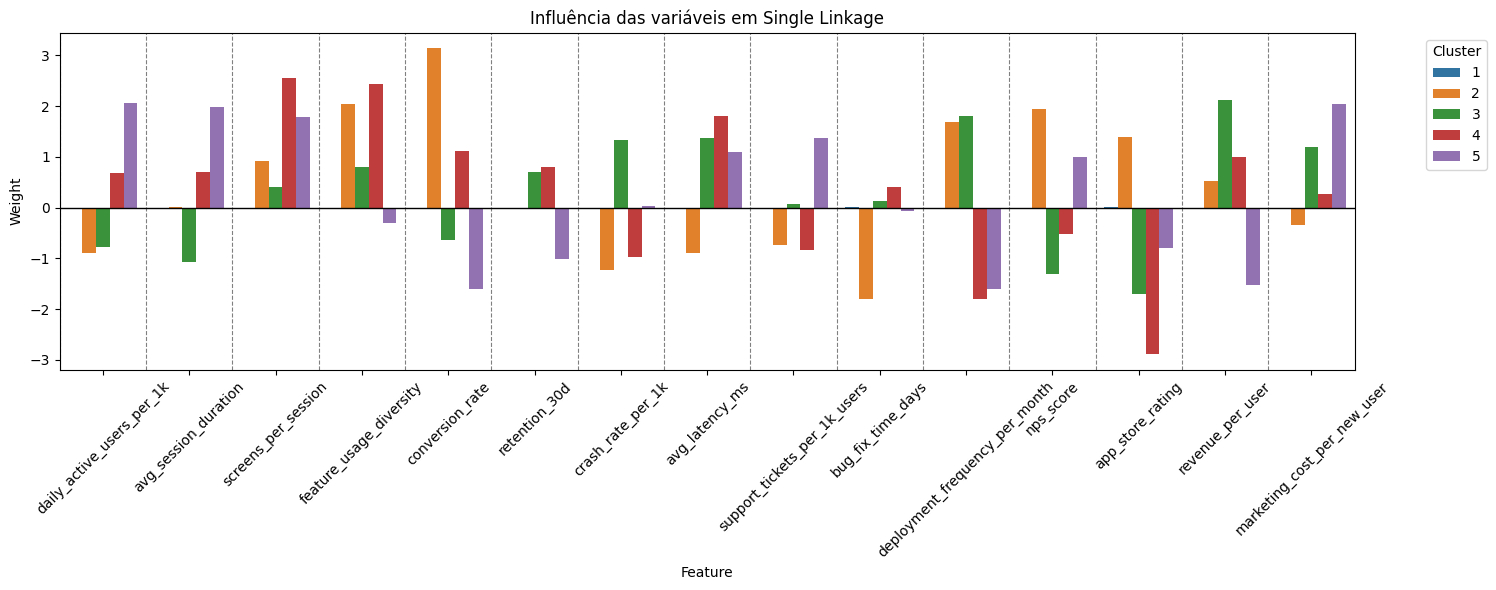

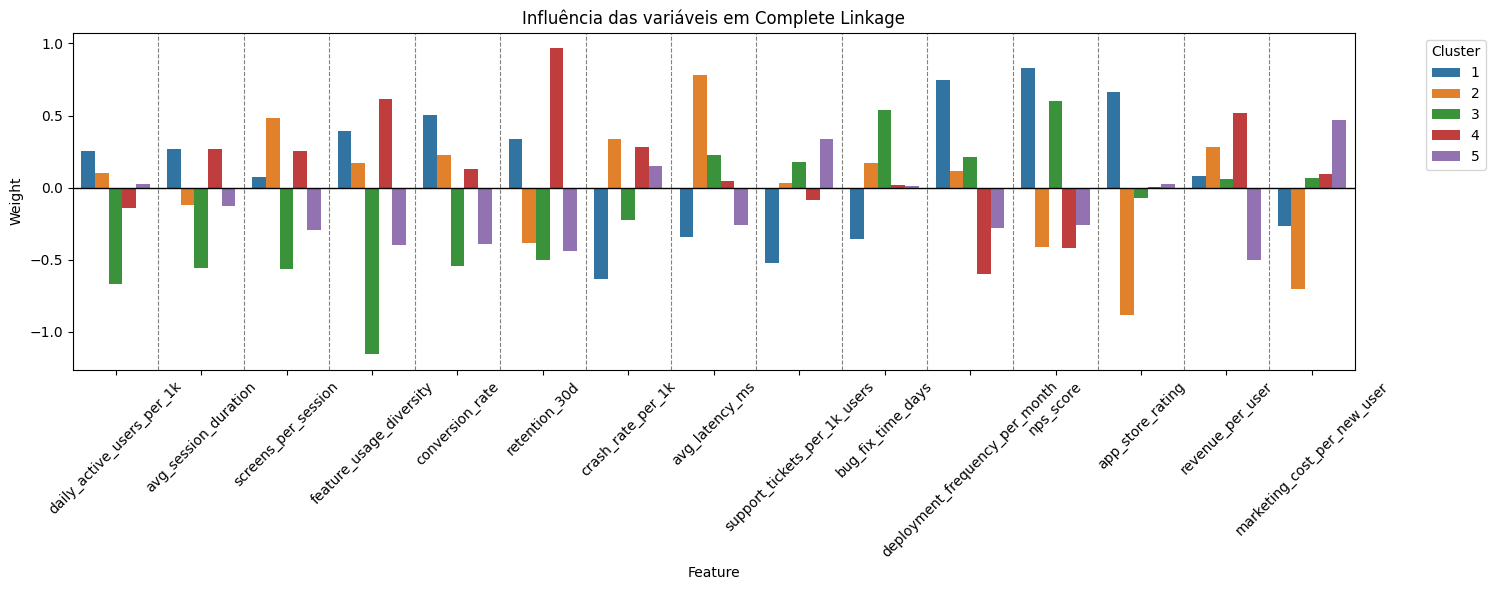

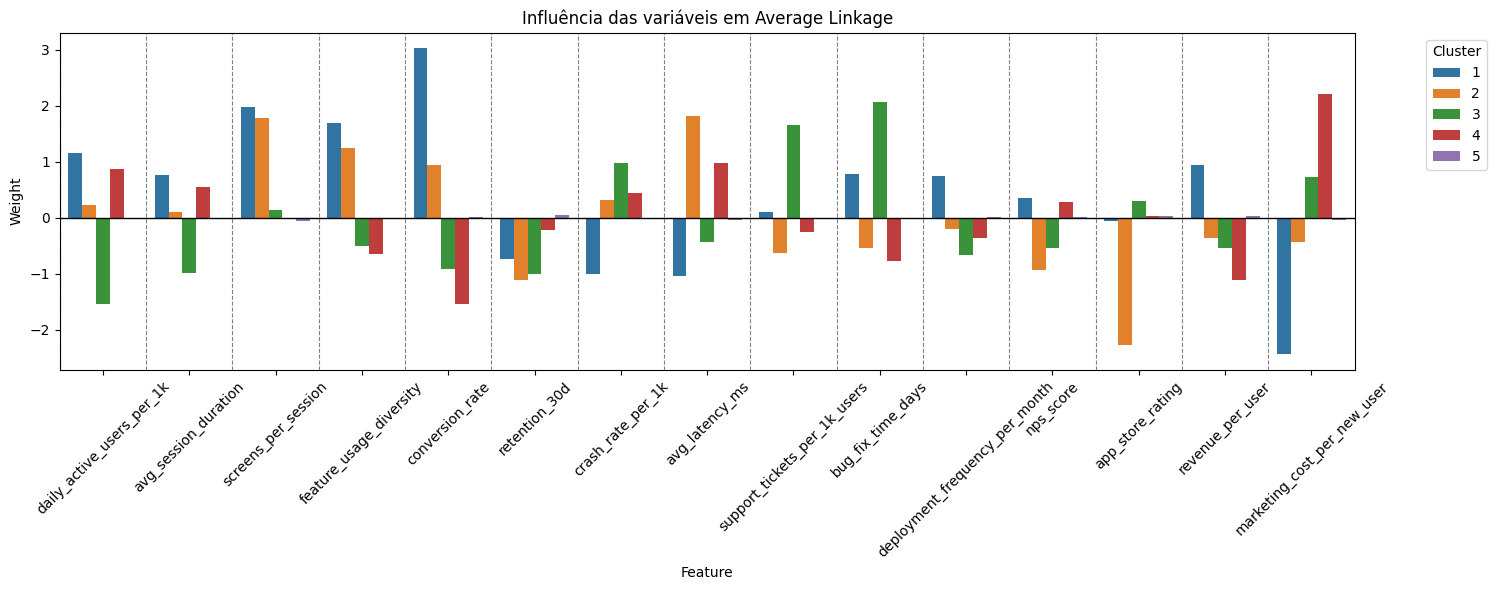

In [48]:
# Single Linkage
features_single = df_sing.drop(columns=['cluster_single'])

global_single_mean = features_single.mean()
global_single_std = features_single.std()

cluster_single_means = df_sing.groupby('cluster_single').mean()

relative_importance_single = (cluster_single_means - global_single_mean) / global_single_std

importance_melted_single = relative_importance_single.reset_index().melt(id_vars='cluster_single')
importance_melted_single.columns = ['cluster_single', 'Feature', 'Relative Weight']

plot_feature_influence(
    data=importance_melted_single,
    cluster_col='cluster_single',
    title="Influência das variáveis em Single Linkage",
    filename="influencia_var_singleL.png"
)

# Complete Linkage
features_comp = df_comp.drop(columns=['cluster_complete'])

global_comp_mean = features_comp.mean()
global_comp_std = features_comp.std()

cluster_comp_means = df_comp.groupby('cluster_complete').mean()

relative_importance_comp = (cluster_comp_means - global_comp_mean) / global_comp_std

importance_melted_comp = relative_importance_comp.reset_index().melt(id_vars='cluster_complete')
importance_melted_comp.columns = ['cluster_complete', 'Feature', 'Relative Weight']

plot_feature_influence(
    data=importance_melted_comp,
    cluster_col='cluster_complete',
    title="Influência das variáveis em Complete Linkage",
    filename="influencia_var_completeL.png"
)


# Average Linkage
features_avg = df_avg.drop(columns=['cluster_average'])

global_avg_mean = features_avg.mean()
global_avg_std = features_avg.std()

cluster_avg_means = df_avg.groupby('cluster_average').mean()

relative_importance_avg = (cluster_avg_means - global_avg_mean) / global_avg_std

importance_melted_avg = relative_importance_avg.reset_index().melt(id_vars='cluster_average')
importance_melted_avg.columns = ['cluster_average', 'Feature', 'Relative Weight']

plot_feature_influence(
    data=importance_melted_avg,
    cluster_col='cluster_average',
    title="Influência das variáveis em Average Linkage",
    filename="influencia_var_average.png"
)

Ao analisarmos os gráficos de barras gerados acima conseguimos retirar as seguintes conclusões para cada tipo de *Linkage*:

- **Single Linkage**:

  Cluster 1: Utilizador comum, nenhuma *feature* tem valor significativo;


  Cluster 2: Utilizadores que utilizam várias *features* na aplicação tendem a realizar a ação-alvo;


  Cluster 3: Maior número de atualizações e adição de feature resulta em maior *revenue* por utilizador;


  Cluster 4: Utilizadores que usam muitos ecrãs e muitas features;


  Cluster 5: Maior número de utilizadores implica maior gasto no marketing;
    
- **Complete Linkage**:


  Cluster 1: Maior número de atualizações resulta em maior *score*;


  Cluster 2: Alta latência leva a pior ratings;


  Cluster 3: Apesar de não se usarem tantas features o tempo de arranjo dos bugs mantém-se elevado;


  Cluster 4: Maior retenção quando se utilizam mais *features*;


  Cluster 5: Maior gasto em novos utilizadores diminui a *revenue* obtida nos mesmos;

- **Average Linkage**:


  Cluster 1: A realização da ação-alvo está relacionada com o número de ecrãs e *features* mas não com marketing;


  Cluster 2: Muitos ecrãs resultam numa latência elevada que por sua vez resulta em piores *scores*;


  Cluster 3: A demora na resolução de bugs resulta em menos utilizadores ativos;


  Cluster 4: Um gasto elevado no marketing não implica um maior número de ações alvo realizadas;


  Cluster 5: Utilizador comum;

### Como podemos notar os resultados da análise são idênticos aos obtidos pelas "Características Médias" e pelos "Perfis dos Clusters"

### 4.1.4 Conclusões Cluster Dataframe 1

Depois de concluídas as etapas anteriores conseguimos retirar algumas observações:

- Tanto o single linkage como o average linkage têm um cluster onde estão contidos maior parte do dados do dataframe total.
Para um total de 251 dados, o single linkage concentra 247, cerca de 98%, no cluster 1 enquanto o average linkage tem 236, representando 94% da amostra total, no cluster 5;

- O complete linkage apresentou uma distribuição mais abragente dos dados entre os clusters, o maior só contém 33% de toda a amostra total;

- A descrepância entre a influência das variáveis nos clusters é menor no complete linkage;

- Os restantes 4 clusters, no single e average linkage, representam uma amostra pequena da população,o que faz com que os valores para as características médias e peso das variáveis influentes seja bastante elevado, o que pode induzir em erro dada a fraca qualidade da amostra.

Desta análise chegamos aà conclusão de que o melhor método a ser escolhido para o nosso dataframe é o "Complete Linkage" visto que oferece a representação mais abrangente da amostra total, dá praticamente a mesma importância a todos os dados ao contrário dos outros dois métodos, sendo possível obter uma análise mais correta e plausível, também oferece uma melhor representação gráfica, que apesar de não ser um argumento eliminatório ajudará na análise visual do problema.

Os restantes métodos só nos seriam úteis se, por algum motivo especial, quiséssemos analisar uma amostra muito pequena.

In [49]:
labels_complete = fcluster(cluster_complete, t=5, criterion='maxclust')

df_clean['classe'] = labels_complete

df_clean # DATAFRAME A UTILIZAR PARA OS RESTANTES MÉTODOS (Trees, SVM, NN)

,daily_active_users_per_1k,avg_session_duration,screens_per_session,feature_usage_diversity,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user,classe
0,1.365073,0.767327,0.261780,-0.032339,0.676673,-0.618089,1.463434,1.076442,0.883539,-0.825774,0.216563,-0.637735,-0.498733,0.016407,-0.014631,5
1,0.014407,-0.053756,-0.834279,-1.181517,0.398714,-0.686036,0.679254,-0.292061,0.577403,-0.187967,-0.608288,0.158461,1.145959,0.262016,-0.139845,3
2,-0.794565,-1.364828,-0.794455,-0.025404,-1.274230,0.337830,-0.048939,-0.509421,-0.112958,0.281242,1.655167,-0.815757,-0.610258,-0.216664,0.849675,3
3,-0.025550,-0.712952,-0.362806,-0.694773,-0.316390,-1.306883,-0.596438,-0.276956,-0.117813,-0.603625,0.580689,0.335633,-0.379222,-0.537343,0.641942,5
4,-0.008756,0.934050,1.951810,0.500113,0.211716,0.407337,-0.115187,-0.569544,1.330020,1.050071,0.917485,0.273601,-0.347407,1.275343,0.369823,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,-0.564947,-0.577750,0.066958,-0.240190,-0.221406,-0.763206,-0.168193,-0.566509,0.034497,-0.896975,0.552006,-0.378577,-0.399597,-0.037425,0.460830,5
247,0.195084,0.137976,-0.233007,-1.276394,-0.664475,-0.595859,-0.404466,-1.145514,0.503114,0.043048,-0.083310,0.905864,1.269130,0.824197,-1.296762,5
248,-0.464582,0.490636,0.161419,0.024003,0.595102,-0.241818,-0.231528,-0.370313,-0.252140,0.911801,0.183247,-0.751287,-0.423034,-0.158510,-0.447048,2
249,0.210654,-0.252353,0.001949,-0.298731,-0.769533,-0.249026,-0.872925,-0.071324,-0.251522,0.687963,-0.130715,0.880865,0.119591,0.307195,1.310083,5


## 4.2 Dataframe 2

## 4.2.1 Hierárquicos

Os algoritmos de clusters hierárquicos que vamos usar são:

- Single;
- Complete;
- Average;

### 4.2.1.1 Simple Linkage

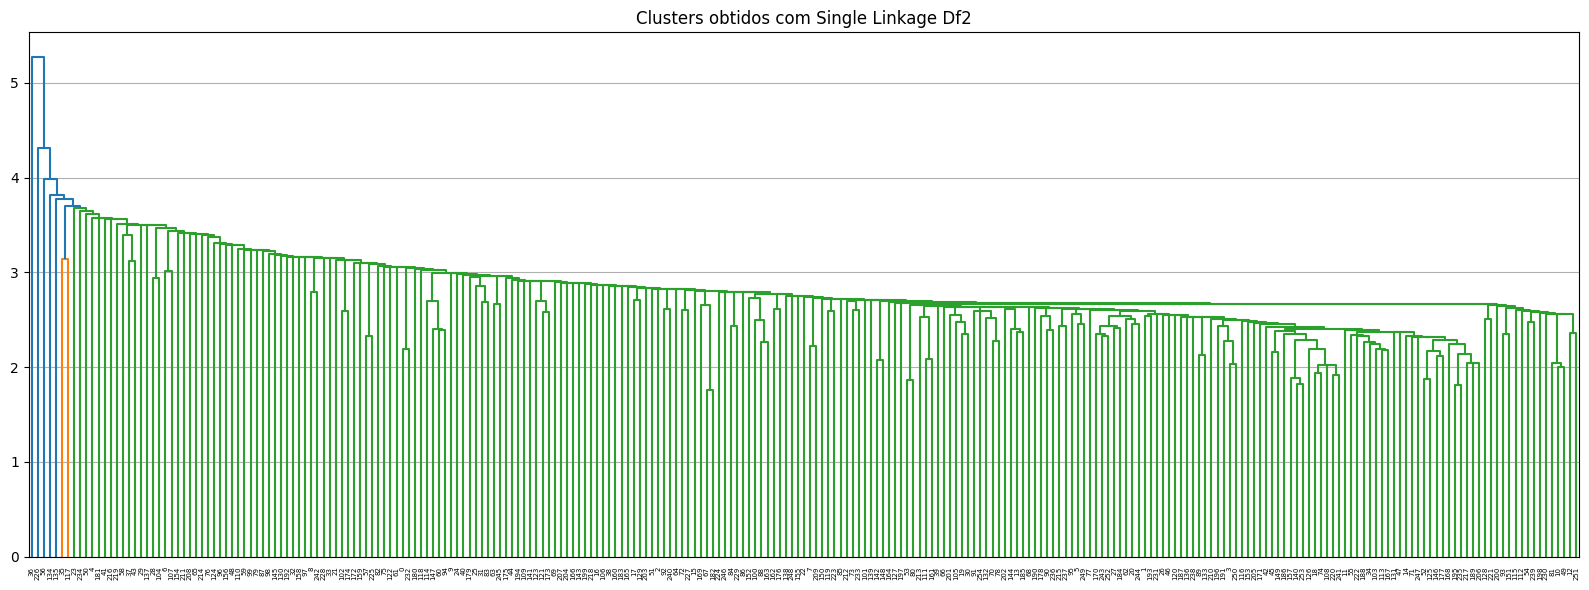

In [50]:
## Implementação Single Linkage
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean_2)

cluster_single_df2 = linkage(X_scaled, method='single')

plt.figure(figsize=(16,6))
dendrogram(cluster_single_df2)
plt.title("Clusters obtidos com Single Linkage Df2")
plt.savefig("dendrograma_single_linkage_df2.png", dpi=300, bbox_inches='tight')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### 4.2.1.2 Complete Linkage

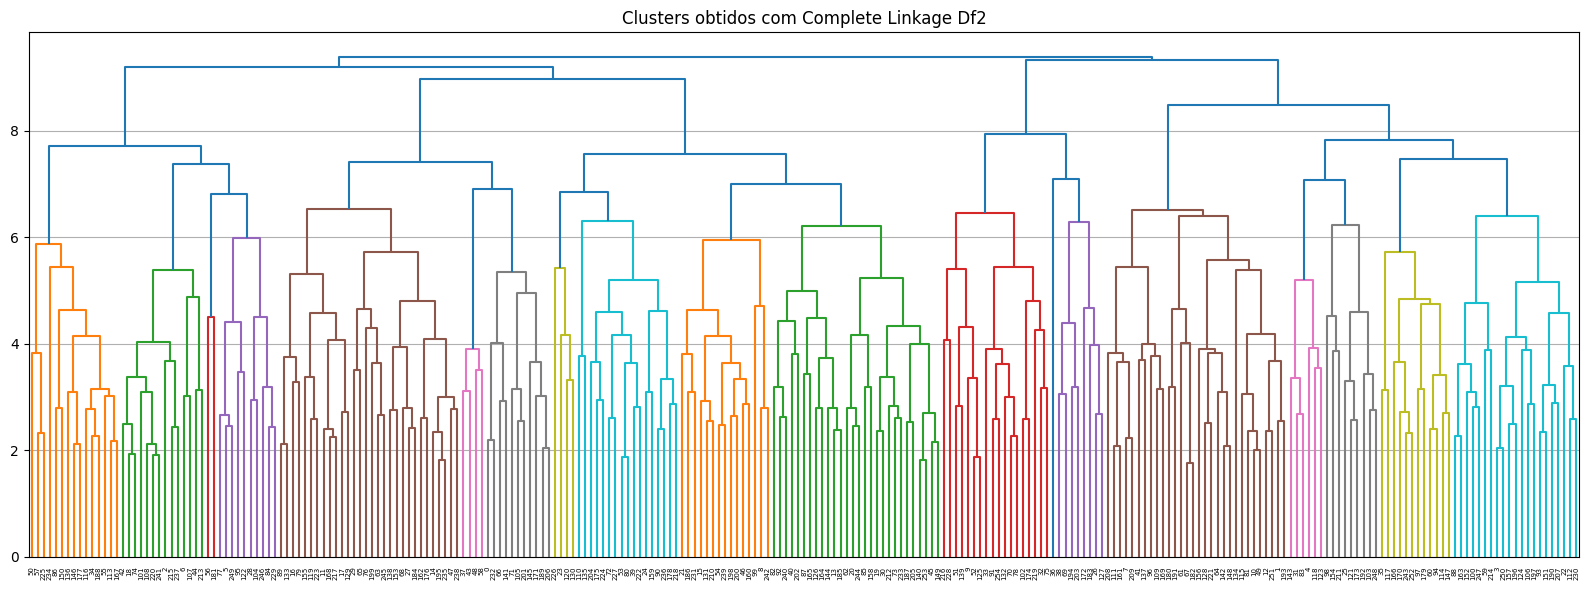

In [51]:
## Implementação Complete Linkage
df_numeric = df_clean_2.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

cluster_complete_df2 = linkage(X_scaled, method='complete')

plt.figure(figsize=(16,6))
dendrogram(cluster_complete_df2)
plt.title("Clusters obtidos com Complete Linkage Df2")
plt.savefig("dendrograma_complete_linkage_df2.png", dpi=300, bbox_inches='tight')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 4.2.1.3 Average Linkage

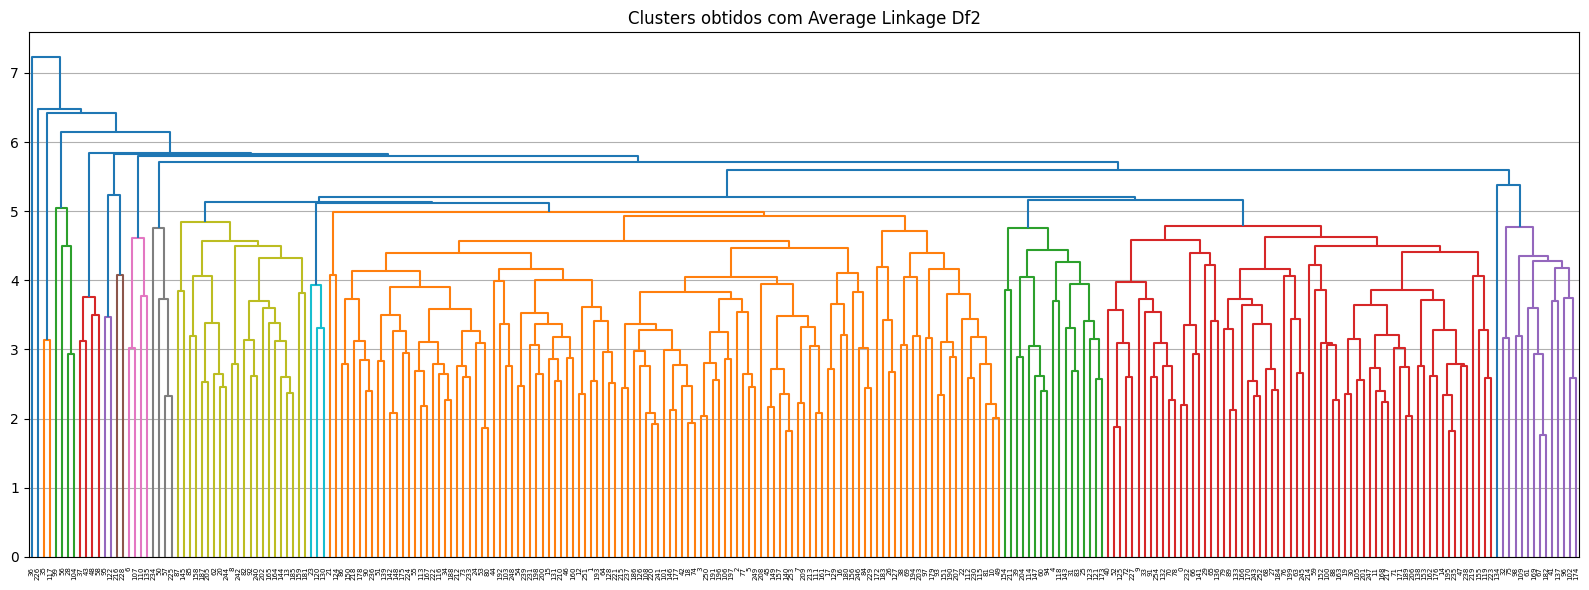

In [52]:
## Implementação Average Linkage
df_numeric = df_clean_2.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

cluster_average_df2 = linkage(X_scaled, method='average')

plt.figure(figsize=(16,6))
dendrogram(cluster_average_df2)
plt.title("Clusters obtidos com Average Linkage Df2")
plt.savefig("dendrograma_avg_linkage_df2.png", dpi=300, bbox_inches='tight')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [53]:
labels = fcluster(cluster_average_df2, 5, criterion='maxclust')

score = silhouette_score(X_scaled, labels)
print(f"k= 5, silhouette={score:.3f}")

k= 5, silhouette=0.058


Á semelhança do dataframe 1 o número de clusters obtido é 5, através da análise visual dos dendrogramas gerados.

### 4.2.2 Não Hierárquicos

#### 4.2.2.1 K-Means

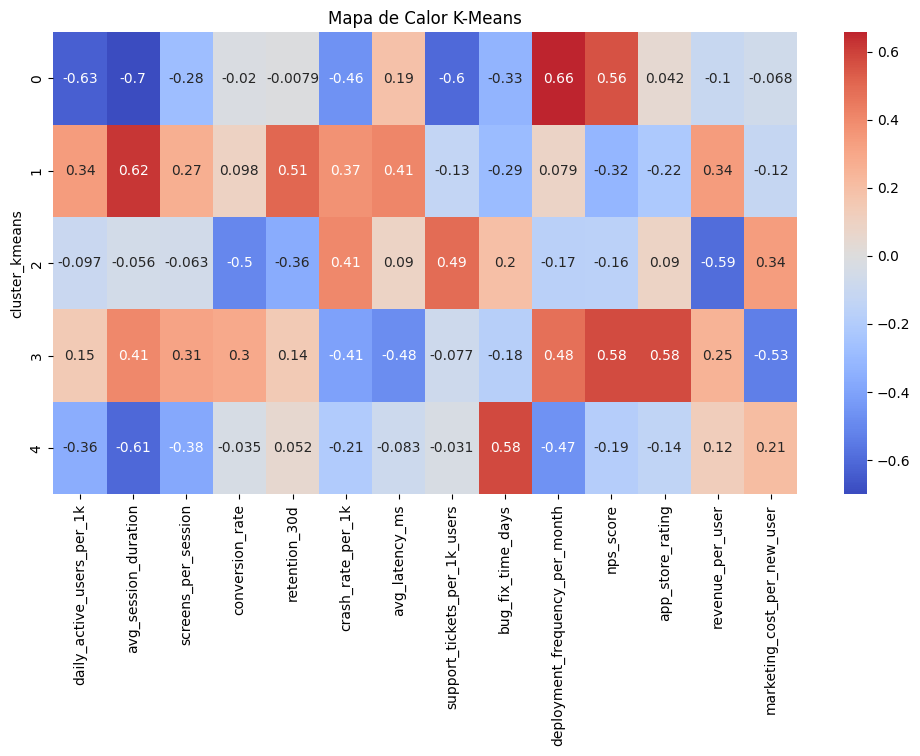

In [54]:
## Implementação K-Means

df_k2 = df_clean_2.copy() 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean_2)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_

# Add cluster labels to your dataframe
df_k2['cluster_kmeans'] = labels

#print(df_k.groupby('cluster_kmeans').mean())

plt.figure(figsize=(12,6))
sns.heatmap(df_k2.groupby('cluster_kmeans').mean(), annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor K-Means")
plt.savefig("k_means.png", dpi=300, bbox_inches='tight')
plt.show()


### 4.2.3 Análise dos clusters

#### 4.2.3.1 Características Médias

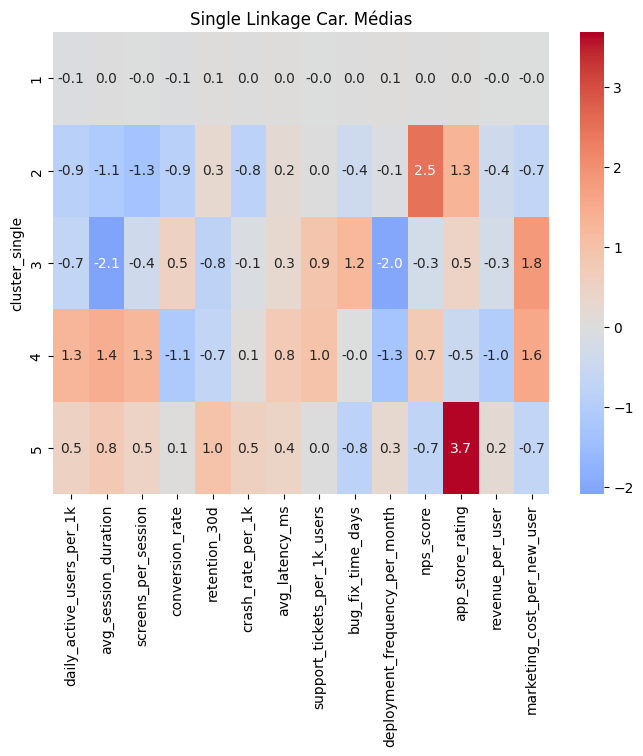

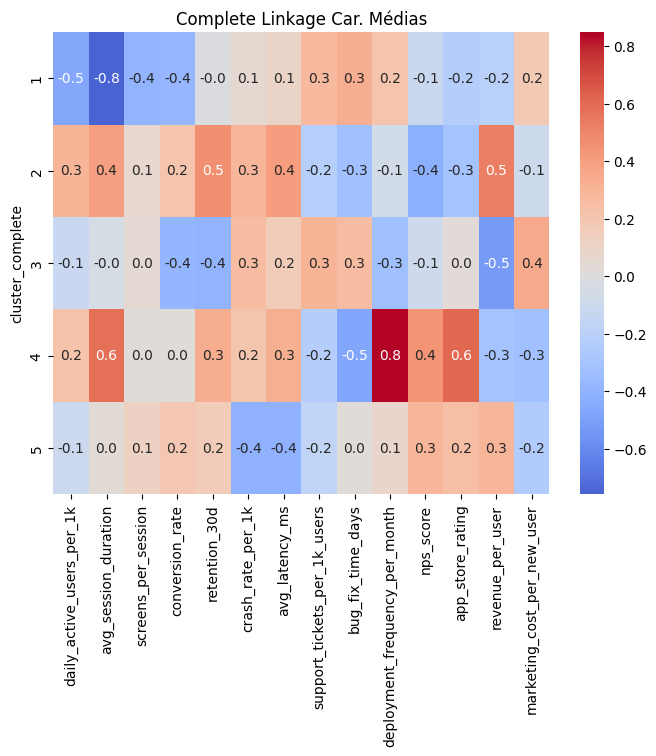

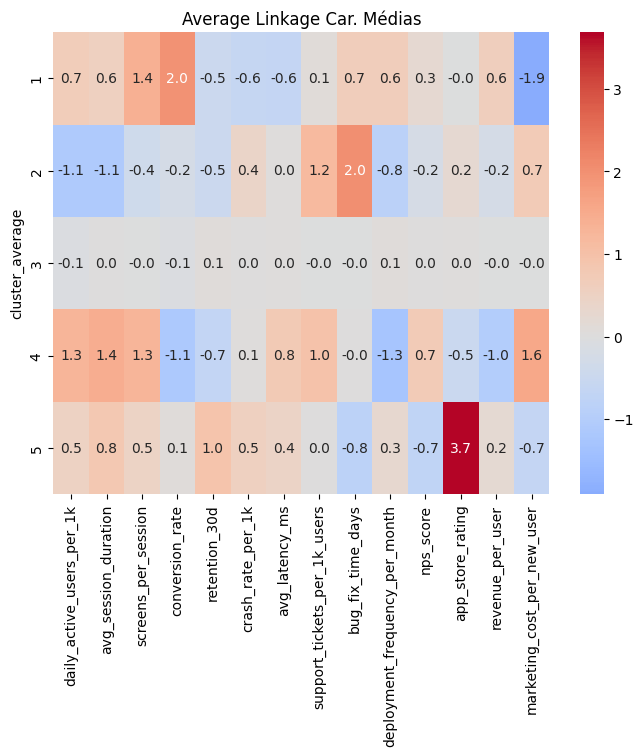

In [55]:
df2_sing = df_clean_2.copy()
labels_single = fcluster(cluster_single_df2, t=5, criterion='maxclust')  
df2_sing['cluster_single'] = labels_single


df2_comp = df_clean_2.copy()
labels_complete = fcluster(cluster_complete_df2, t=5, criterion='maxclust')  
df2_comp['cluster_complete'] = labels_complete

df2_avg = df_clean_2.copy()
labels_avg = fcluster(cluster_average_df2, t=5, criterion='maxclust')  
df2_avg['cluster_average'] = labels_avg

# Single Linkage
plt.figure(figsize=(8,6))
sns.heatmap(df2_sing.groupby('cluster_single').mean(), annot=True,fmt=".1f", cmap='coolwarm', center=0)
plt.title("Single Linkage Car. Médias")
plt.savefig("mapa_calor_single_linkage_df2.png", dpi=300, bbox_inches='tight')
plt.show()

# Complete Linkage
plt.figure(figsize=(8,6))
sns.heatmap(df2_comp.groupby('cluster_complete').mean(), annot=True,fmt=".1f", cmap='coolwarm', center=0)
plt.title("Complete Linkage Car. Médias")
plt.savefig("mapa_calor_complete_linkage_df2.png", dpi=300, bbox_inches='tight')
plt.show() 

# Average Linkage
plt.figure(figsize=(8,6))
sns.heatmap(df2_avg.groupby('cluster_average').mean(), annot=True,fmt=".1f",cmap='coolwarm', center=0)
plt.title("Average Linkage Car. Médias")
plt.savefig("mapa_calor_avg_linkage_df2.png", dpi=300, bbox_inches='tight')
plt.show()

Ao analisarmos os mapas de calor gerados acima conseguimos retirar as seguintes conclusões para cada tipo de *Linkage*:

- **Single Linkage**:

  Cluster 1: Utilizador comum, não existem features que os distingam;


  Cluster 2: Utilizadores que dão altas classificações à aplicação e não usam muitos ecrãs;


  Cluster 3: Alto valor de marketing investido mas sessões de utilização curtas;


  Cluster 4: Alto valor de marketing investido resulta em mais utilizadores?????;


  Cluster 5: Utilizadores que regressaram após a primeira utilização e dão melhores ratings;
    
- **Complete Linkage**:


  Cluster 1: Utilizadores sem interesse na aplicação;


  Cluster 2: Utilizadores que regressaram após a primeira utilização e geraram receita;


  Cluster 3: Utilizadores com forte investimento em marketing mas que não geraram receita;


  Cluster 4: Utilizadores que utilizaram a aplicação durante mais tempo, alavancado pela adição de *features*;


  Cluster 5: Utilizadores com problemas no funcionamento da aplicação;

- **Average Linkage**:


  Cluster 1: Utilizadores que realizam a ação-alvo e usam mais ecrãs, mas com menos envestimento de marketing;


  Cluster 2: Utilizadores que se depararam com bugs durante a utilização;


  Cluster 3: Utilizador comum;


  Cluster 4: Alto valor de marketing investido resulta em mais utilizadores?????;


  Cluster 5: Utilizadores que regressaram após a primeira utilização e dão melhores ratings;

#### 4.2.3.2 Perfis dos Clusters


===== CLUSTER PROFILES =====

Cluster 1 (n=251, share=98.43%):
  • lower than average app_store_rating (-0.03σ)
  • higher than average deployment_frequency_per_month (0.02σ)
  • lower than average nps_score (-0.01σ)

Cluster 2 (n=1, share=0.39%):
  • higher than average nps_score (3.35σ)
  • lower than average screens_per_session (-1.94σ)
  • higher than average app_store_rating (1.91σ)

Cluster 3 (n=1, share=0.39%):
  • lower than average avg_session_duration (-2.84σ)
  • lower than average deployment_frequency_per_month (-2.56σ)
  • higher than average marketing_cost_per_new_user (2.31σ)

Cluster 4 (n=1, share=0.39%):
  • higher than average daily_active_users_per_1k (2.04σ)
  • higher than average marketing_cost_per_new_user (1.99σ)
  • higher than average avg_session_duration (1.93σ)

Cluster 5 (n=1, share=0.39%):
  • higher than average app_store_rating (5.51σ)
  • higher than average retention_30d (1.30σ)
  • higher than average avg_session_duration (1.08σ)


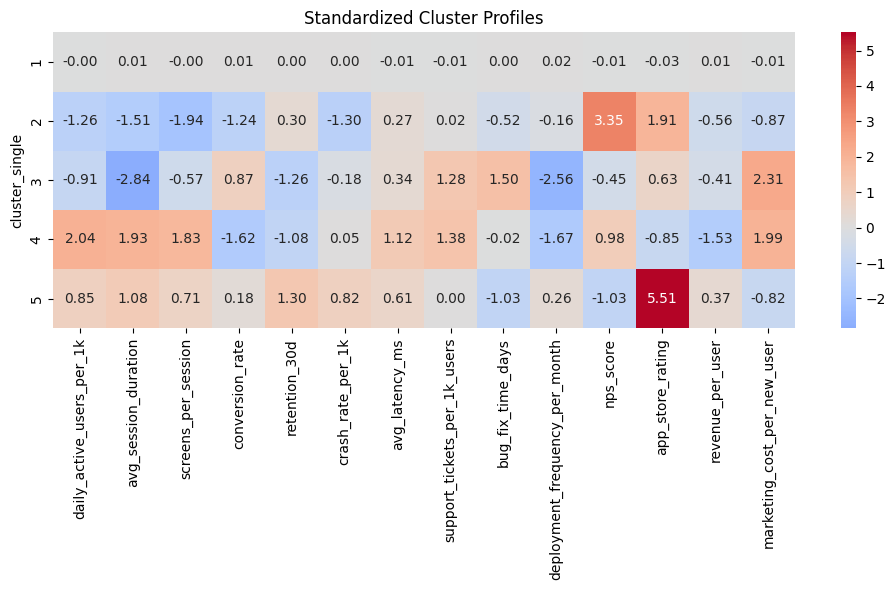


===== CLUSTER PROFILES =====

Cluster 1 (n=41, share=16.08%):
  • lower than average avg_session_duration (-1.04σ)
  • lower than average daily_active_users_per_1k (-0.61σ)
  • lower than average screens_per_session (-0.58σ)

Cluster 2 (n=45, share=17.65%):
  • higher than average revenue_per_user (0.81σ)
  • lower than average nps_score (-0.62σ)
  • higher than average retention_30d (0.59σ)

Cluster 3 (n=64, share=25.10%):
  • lower than average revenue_per_user (-0.76σ)
  • lower than average retention_30d (-0.68σ)
  • lower than average conversion_rate (-0.49σ)

Cluster 4 (n=27, share=10.59%):
  • higher than average deployment_frequency_per_month (0.98σ)
  • higher than average app_store_rating (0.85σ)
  • higher than average avg_session_duration (0.77σ)

Cluster 5 (n=78, share=30.59%):
  • lower than average avg_latency_ms (-0.68σ)
  • lower than average crash_rate_per_1k (-0.68σ)
  • higher than average revenue_per_user (0.46σ)


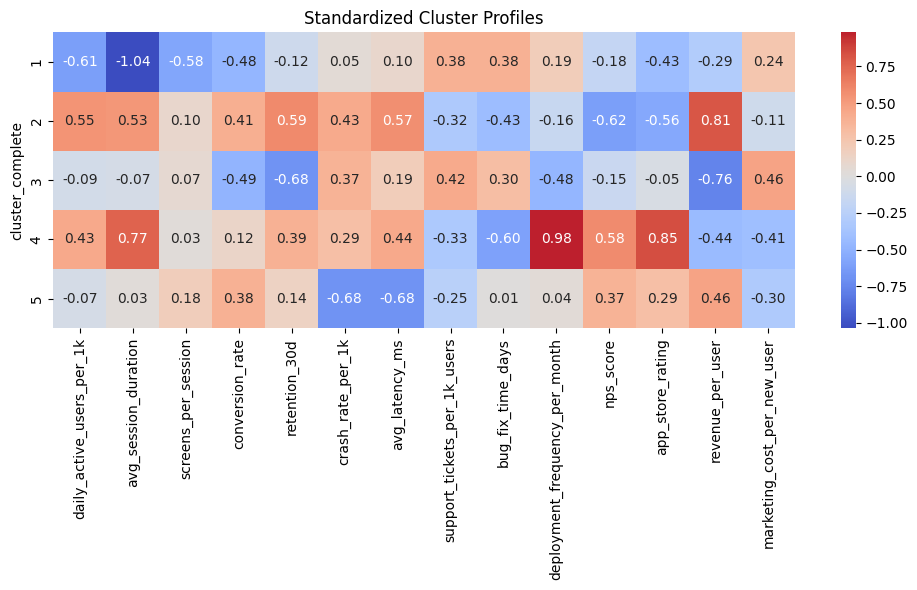


===== CLUSTER PROFILES =====

Cluster 1 (n=2, share=0.78%):
  • higher than average conversion_rate (3.03σ)
  • lower than average marketing_cost_per_new_user (-2.40σ)
  • higher than average screens_per_session (2.02σ)

Cluster 2 (n=4, share=1.57%):
  • higher than average bug_fix_time_days (2.45σ)
  • higher than average support_tickets_per_1k_users (1.66σ)
  • lower than average daily_active_users_per_1k (-1.53σ)

Cluster 3 (n=247, share=96.86%):
  • lower than average bug_fix_time_days (-0.04σ)
  • lower than average support_tickets_per_1k_users (-0.03σ)
  • lower than average app_store_rating (-0.02σ)

Cluster 4 (n=1, share=0.39%):
  • higher than average daily_active_users_per_1k (2.04σ)
  • higher than average marketing_cost_per_new_user (1.99σ)
  • higher than average avg_session_duration (1.93σ)

Cluster 5 (n=1, share=0.39%):
  • higher than average app_store_rating (5.51σ)
  • higher than average retention_30d (1.30σ)
  • higher than average avg_session_duration (1.08σ)


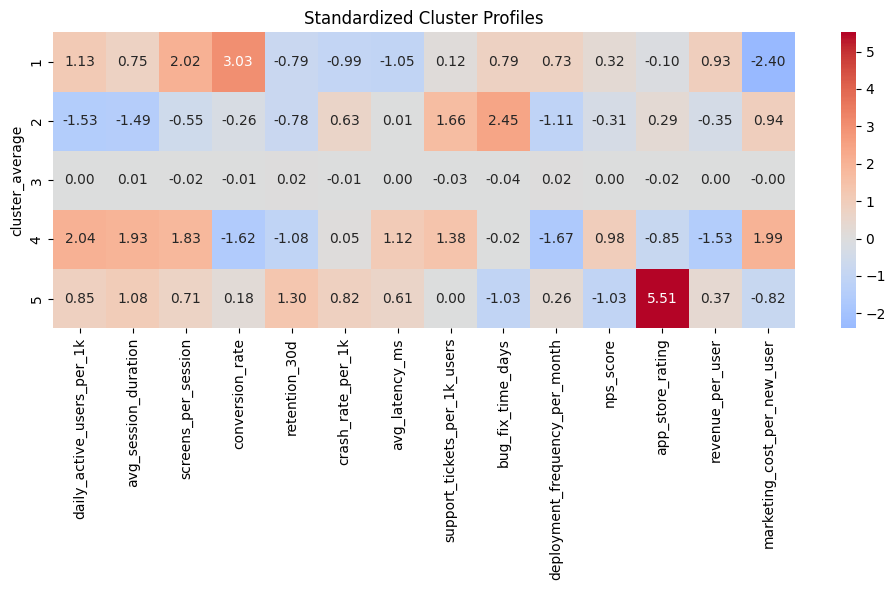


===== CLUSTER PROFILES =====

Cluster 0 (n=31, share=12.16%):
  • lower than average avg_session_duration (-0.96σ)
  • lower than average daily_active_users_per_1k (-0.86σ)
  • lower than average support_tickets_per_1k_users (-0.86σ)

Cluster 1 (n=61, share=23.92%):
  • higher than average avg_session_duration (0.83σ)
  • higher than average retention_30d (0.65σ)
  • higher than average daily_active_users_per_1k (0.61σ)

Cluster 2 (n=66, share=25.88%):
  • lower than average revenue_per_user (-0.87σ)
  • higher than average support_tickets_per_1k_users (0.70σ)
  • lower than average conversion_rate (-0.66σ)

Cluster 3 (n=48, share=18.82%):
  • lower than average avg_latency_ms (-0.79σ)
  • higher than average app_store_rating (0.79σ)
  • higher than average nps_score (0.76σ)

Cluster 4 (n=49, share=19.22%):
  • lower than average avg_session_duration (-0.83σ)
  • higher than average bug_fix_time_days (0.69σ)
  • lower than average deployment_frequency_per_month (-0.65σ)


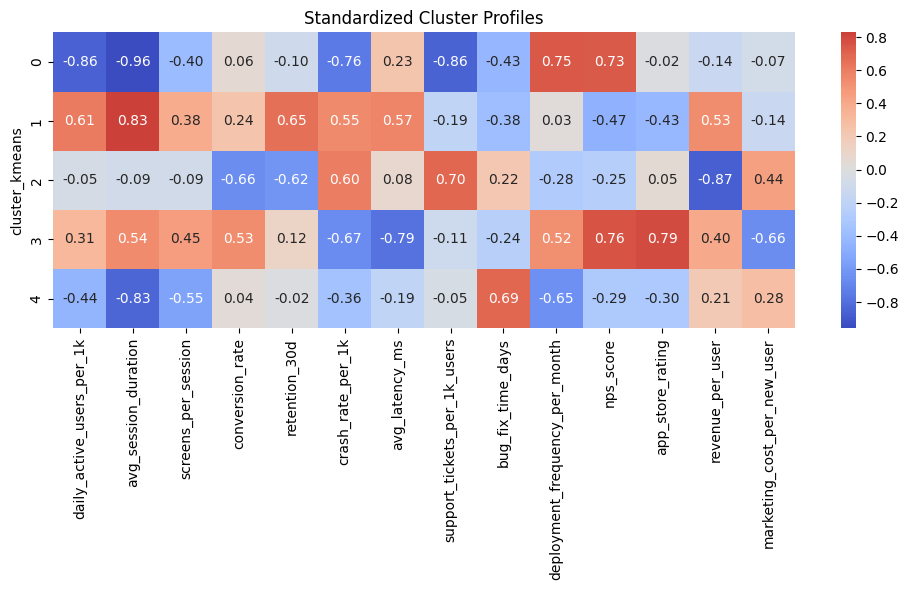

In [56]:
profiles_single_df2 = cluster_profiling(
    df=df2_sing,
    cluster_col='cluster_single'
)

profiles_complete_df2 = cluster_profiling(
    df=df2_comp,
    cluster_col='cluster_complete'
)

profiles_average_df2 = cluster_profiling(
    df=df2_avg,
    cluster_col='cluster_average'
)

profiles_kMeans_df2 = cluster_profiling(
    df= df_k2, 
    cluster_col = 'cluster_kmeans'
)

#### 4.2.3.3 Variáveis Mais Influentes

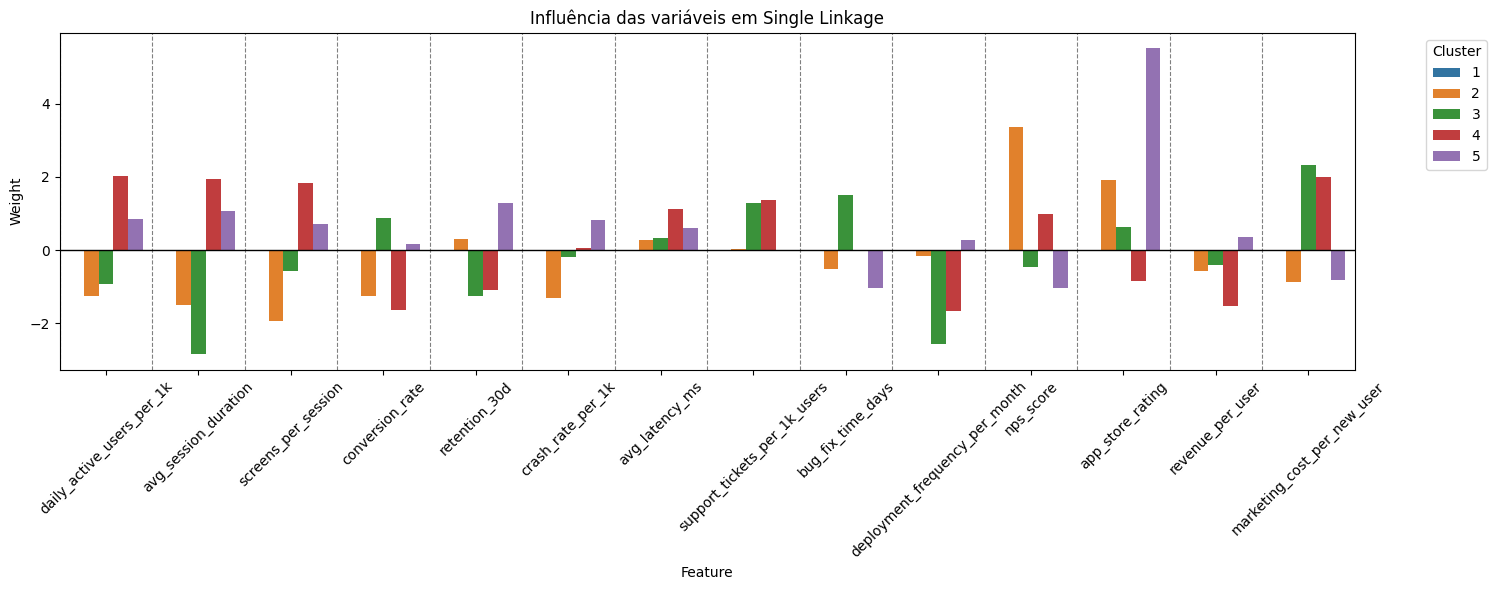

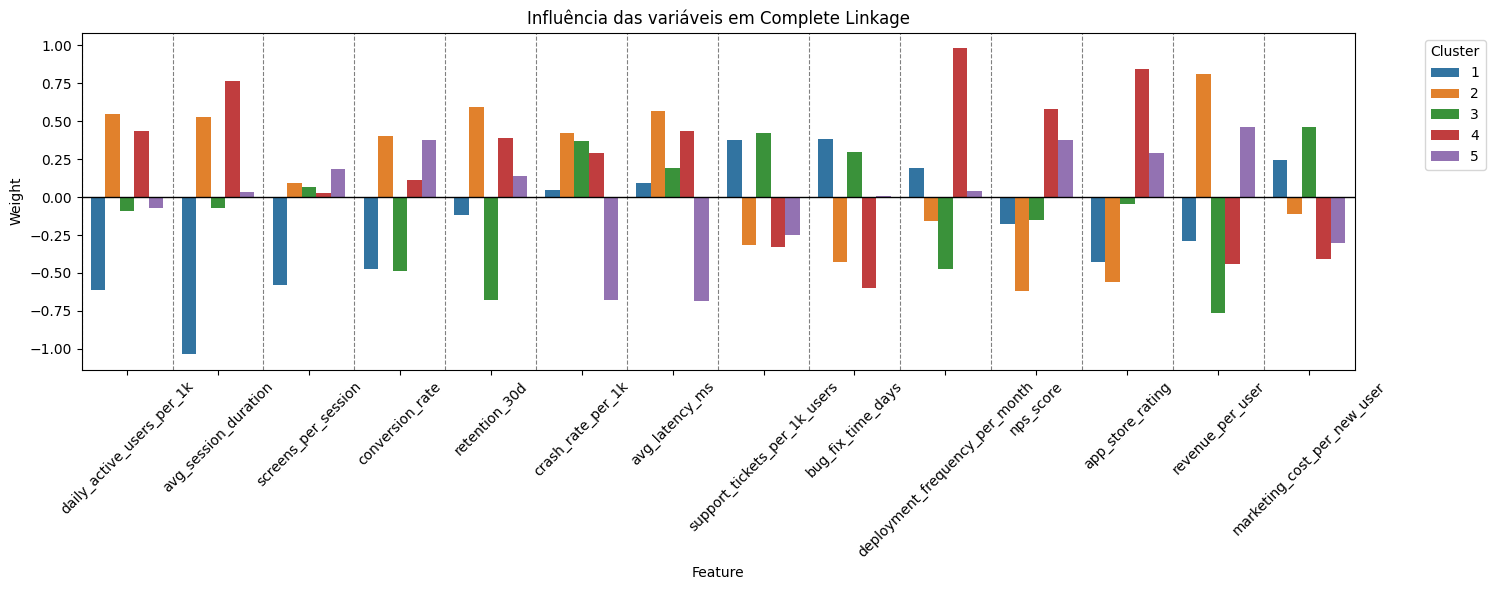

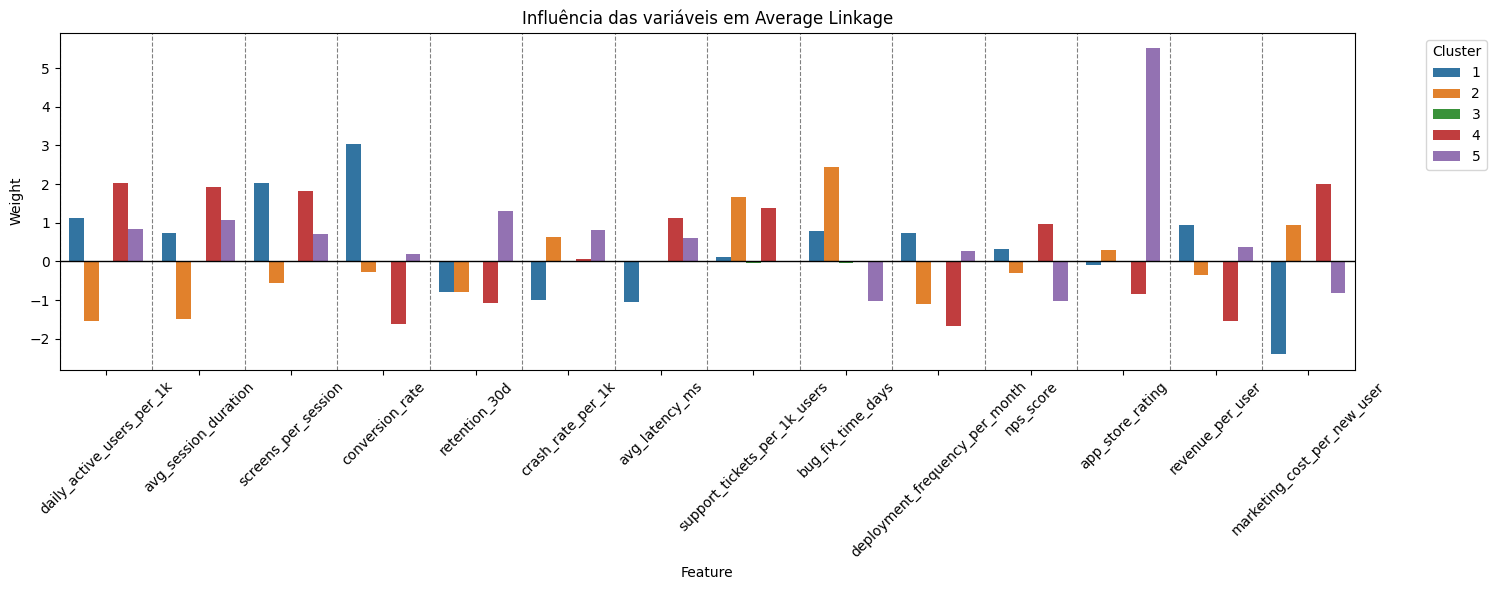

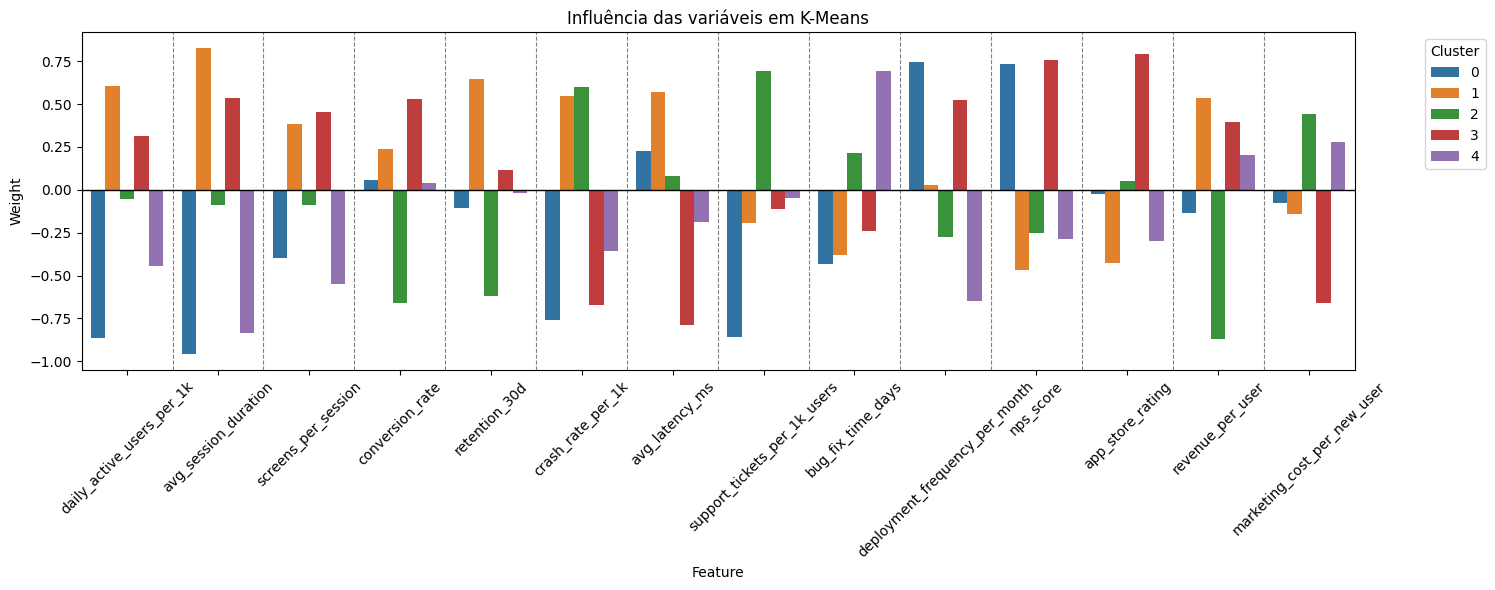

In [57]:
# Single Linkage
features_single = df2_sing.drop(columns=['cluster_single'])

global_single_mean = features_single.mean()
global_single_std = features_single.std()

cluster_single_means = df2_sing.groupby('cluster_single').mean()

relative_importance_single = (cluster_single_means - global_single_mean) / global_single_std

importance_melted_single = relative_importance_single.reset_index().melt(id_vars='cluster_single')
importance_melted_single.columns = ['cluster_single', 'Feature', 'Relative Weight']

plot_feature_influence(
    data=importance_melted_single,
    cluster_col='cluster_single',
    title="Influência das variáveis em Single Linkage",
    filename="influencia_var_singleL_df2.png"
)

# Complete Linkage
features_comp = df2_comp.drop(columns=['cluster_complete'])

global_comp_mean = features_comp.mean()
global_comp_std = features_comp.std()

cluster_comp_means = df2_comp.groupby('cluster_complete').mean()

relative_importance_comp = (cluster_comp_means - global_comp_mean) / global_comp_std

importance_melted_comp = relative_importance_comp.reset_index().melt(id_vars='cluster_complete')
importance_melted_comp.columns = ['cluster_complete', 'Feature', 'Relative Weight']

plot_feature_influence(
    data=importance_melted_comp,
    cluster_col='cluster_complete',
    title="Influência das variáveis em Complete Linkage",
    filename="influencia_var_completeL_df2.png"
)


# Average Linkage
features_avg = df2_avg.drop(columns=['cluster_average'])

global_avg_mean = features_avg.mean()
global_avg_std = features_avg.std()

cluster_avg_means = df2_avg.groupby('cluster_average').mean()

relative_importance_avg = (cluster_avg_means - global_avg_mean) / global_avg_std

importance_melted_avg = relative_importance_avg.reset_index().melt(id_vars='cluster_average')
importance_melted_avg.columns = ['cluster_average', 'Feature', 'Relative Weight']

plot_feature_influence(
    data=importance_melted_avg,
    cluster_col='cluster_average',
    title="Influência das variáveis em Average Linkage",
    filename="influencia_var_average_df2.png"
)


# Average Linkage
features_kMean = df_k2.drop(columns=['cluster_kmeans'])

global_k_mean = features_kMean.mean()
global_k_std = features_kMean.std()

cluster_k_means = df_k2.groupby('cluster_kmeans').mean()

relative_importance_k = (cluster_k_means - global_k_mean) / global_k_std

importance_melted_k = relative_importance_k.reset_index().melt(id_vars='cluster_kmeans')
importance_melted_k.columns = ['cluster_kmeans', 'Feature', 'Relative Weight']

plot_feature_influence(
    data=importance_melted_k,
    cluster_col='cluster_kmeans',
    title="Influência das variáveis em K-Means",
    filename="influencia_var_kMeans_df2.png"
)

Ao analisarmos os mapas de calor gerados acima conseguimos retirar as seguintes conclusões para cada tipo de *Linkage*:

- **Single Linkage**:

  Cluster 1: Utilizador comum, não existem features que os distingam;


  Cluster 2: Utilizadores que dão altas classificações à aplicação e não usam muitos ecrãs;


  Cluster 3: Alto valor de marketing investido mas sessões de utilização curtas;


  Cluster 4: Alto valor de marketing investido resulta em mais utilizadores?????;


  Cluster 5: Utilizadores que regressaram após a primeira utilização e dão melhores ratings;
    
- **Complete Linkage**:


  Cluster 1: Utilizadores sem interesse na aplicação;


  Cluster 2: Utilizadores que regressaram após a primeira utilização e geraram receita;


  Cluster 3: Utilizadores com forte investimento em marketing mas que não geraram receita;


  Cluster 4: Utilizadores que utilizaram a aplicação durante mais tempo, alavancado pela adição de *features*;


  Cluster 5: Utilizadores com problemas no funcionamento da aplicação;

- **Average Linkage**:


  Cluster 1: Utilizadores que realizam a ação-alvo e usam mais ecrãs, mas com menos envestimento de marketing;


  Cluster 2: Utilizadores que se depararam com bugs durante a utilização;


  Cluster 3: Utilizador comum;


  Cluster 4: Alto valor de marketing investido resulta em mais utilizadores?????;


  Cluster 5: Utilizadores que regressaram após a primeira utilização e dão melhores ratings;


- **K-Means**:


  Cluster 1: Poucos utilizadores então menos problemas no funcionamento da aplicação, aumenta o rating;


  Cluster 2: Utilizadores que mais usam a aplicação e encontram mais problemas;


  Cluster 3: Problemas na aplicação levam a menos utilizadores e menos revenue ;


  Cluster 4: Utilizadores que se depararam com menos problemas e deram bons ratings;


  Cluster 5: Muitos bugs diminui o tempo de utilização;
 

### 4.2.4 Conclusões Cluster Dataframe 2

Depois de concluídas as etapas anteriores conseguimos retirar algumas observações:

- Tanto o single linkage como o average linkage têm um cluster onde estão contidos maior parte do dados do dataframe total.
Para um total de 255 dados, o single linkage concentra 251, cerca de 98%, no cluster 1 enquanto o average linkage tem 247, representando 98% da amostra total, no cluster 3;

- O complete linkage apresentou uma distribuição mais abragente dos dados entre os clusters hierárquicos, o maior só contém 30% de toda a amostra total;

- A descrepância entre a influência das variáveis nos clusters é menor no complete linkage;

- Os restantes 4 clusters, no single e average linkage, representam uma amostra pequena da população,o que faz com que os valores para as características médias e peso das variáveis influentes seja bastante elevado, o que pode induzir em erro dada a fraca qualidade da amostra.

- O K-Means possui, tal como o complete linkage, uma boa distrubuição dos dados, esta é ligeiramente melhor pois todos os clusters têm valores semelhantes.

Desta análise chegamos à conclusão de que o melhor método a ser escolhido para o nosso dataframe é o K-Means visto que oferece a representação mais abrangente da amostra total, dá praticamente a mesma importância a todos os dados ao contrário dos outros três métodos, sendo possível obter uma análise mais correta e plausível.

Os restantes métodos, à exceção do complete linkage, só nos seriam úteis se, por algum motivo especial, quiséssemos analisar uma amostra muito pequena.

## 5.0 Conclusões Gerais
Como é possível ver, dos processos realizados para os dois dataframes surgem resultados semelhantes, como o segundo dataframe é o que contém as variáveis úteis da nossa amostra, será esse que vamos utilizar na análise final.

No requisito dos clusters vamos, como mencionado no ponto 4.2.4, utilizar os clusters gerados pelo *K-Means* pelos motivos descritos no mesmo ponto.

In [59]:
df_clean_2['classe'] = kmeans.labels_ + 1
df_clean_2.to_csv('df_group4_classe.csv', index=False)

df_clean_2 # DATAFRAME A UTILIZAR PARA OS RESTANTES MÉTODOS (Trees, SVM, NN)

,daily_active_users_per_1k,avg_session_duration,screens_per_session,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user,classe
0,1.365073,0.767327,0.261780,0.676673,-0.618089,1.463434,1.076442,0.883539,-0.825774,0.216563,-0.637735,-0.498733,0.016407,-0.014631,2
1,0.014407,-0.053756,-0.834279,0.398714,-0.686036,0.679254,-0.292061,0.577403,-0.187967,-0.608288,0.158461,1.145959,0.262016,-0.139845,3
2,-0.794565,-1.364828,-0.794455,-1.274230,0.337830,-0.048939,-0.509421,-0.112958,0.281242,1.655167,-0.815757,-0.610258,-0.216664,0.849675,5
3,-0.025550,-0.712952,-0.362806,-0.316390,-1.306883,-0.596438,-0.276956,-0.117813,-0.603625,0.580689,0.335633,-0.379222,-0.537343,0.641942,1
4,-0.008756,0.934050,1.951810,0.211716,0.407337,-0.115187,-0.569544,1.330020,1.050071,0.917485,0.273601,-0.347407,1.275343,0.369823,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,-0.564947,-0.577750,0.066958,-0.221406,-0.763206,-0.168193,-0.566509,0.034497,-0.896975,0.552006,-0.378577,-0.399597,-0.037425,0.460830,1
251,0.195084,0.137976,-0.233007,-0.664475,-0.595859,-0.404466,-1.145514,0.503114,0.043048,-0.083310,0.905864,1.269130,0.824197,-1.296762,4
252,-0.464582,0.490636,0.161419,0.595102,-0.241818,-0.231528,-0.370313,-0.252140,0.911801,0.183247,-0.751287,-0.423034,-0.158510,-0.447048,5
253,0.210654,-0.252353,0.001949,-0.769533,-0.249026,-0.872925,-0.071324,-0.251522,0.687963,-0.130715,0.880865,0.119591,0.307195,1.310083,5
